In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import openpyxl
import os
import numpy as np
from openpyxl import load_workbook
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
print (os.getcwd())
current_dir = os.path.dirname(os.path.abspath("__file__"))
try:
    TOT_EX_PATH = os.path.join(current_dir, 'dataset.csv')
#    TOT_EX_PATH.replace("\" , "/")
except:
    print('You should have to use file name with "modified department name". Check it')
print("TOT_EX_PATH:", TOT_EX_PATH)


'''
    str_pastDate = '2019-09-03 20:02'
    str_nowDate = '2019-10-02 20:00'
    29 days -> 20880
'''

dfs = pd.read_csv(TOT_EX_PATH, encoding ='utf-8')
tot_info = dfs

Using TensorFlow backend.


C:\Users\Admin\Dropbox\과제 정리\군집지능\업무보고, 월간보고, 회의록, 발표자료\[IoT군집지능]20191115 데모준비
TOT_EX_PATH: C:\Users\Admin\Dropbox\과제 정리\군집지능\업무보고, 월간보고, 회의록, 발표자료\[IoT군집지능]20191115 데모준비\dataset.csv


In [2]:
# import tensorflow as tf
# from tensorflow import keras
# import time
# import datetime
# import pandas as pd
# from matplotlib import pyplot as plt
# from matplotlib import animation
# new_model = keras.models.load_model('LSTM_model.h5')
# new_model.summary()

In [3]:
dfs.keys()

Index(['time', 'co2_4', 'h_10', 'h_11', 'h_12', 't_10', 't_11', 't_12',
       'tvoc_4', 'co2_41', 'h_41', 'pm025_41', 'pm100_41', 't_41', 'tvoc_41',
       'co2_42', 'h_42', 'pm025_42', 'pm100_42', 't_42', 'tvoc_42', 'co2_43',
       'h_43', 'pm025_43', 'pm100_43', 't_43', 'tvoc_43', 'co2_44', 'h_44',
       'pm025_44', 'pm100_44', 't_44', 'tvoc_44', 'co2_45', 'h_45', 'pm025_45',
       'pm100_45', 't_45', 'tvoc_45', 'co2_47', 'h_47', 'pm025_47', 'pm100_47',
       't_47', 'tvoc_47', 'co2_48', 'h_48', 'pm025_48', 'pm100_48', 't_48',
       'tvoc_48', 'h_50', 't_50', 'h_51', 't_51', 'h_52', 't_52', 'co2_61',
       'h_61', 'pm025_61', 'pm100_61', 't_61', 'tvoc_61', 'co2_62', 'h_62',
       'pm025_62', 'pm100_62', 't_62', 'tvoc_62', 'co2_63', 'h_63', 'pm025_63',
       'pm100_63', 't_63', 'tvoc_63', 'co2_64', 'h_64', 'pm025_64', 'pm100_64',
       't_64', 'tvoc_64', 'co2_65', 'h_65', 'pm025_65', 'pm100_65', 't_65',
       'tvoc_65', 'co2_66', 'h_66', 'pm025_66', 'pm100_66', 't_66', 'tvo

In [4]:
# # 학습에 사용할 데이터-> 전부 사용해서 각 값들을 예측하는 방향으로 진행 
# # LSTM 모델을 사용할 것
# sen_list = []
# for i in dfs.keys()[1:]:
#     if i.split('_')[1] in ['41', '42', '61']:
#         if i.split('_')[0] in ['h', 'pm025', 'pm100', 't']:
#             sen_list.append(i)
# print(sen_list)

In [5]:
# 학습에 사용할 데이터-> 전부 사용해서 각 값들을 예측하는 방향으로 진행 
# LSTM 모델을 사용할 것
sen_list = []
for i in dfs.keys()[1:]:
    if i.split('_')[1] in ['43', '63', '65']:
        if i.split('_')[0] in ['h', 'pm025', 'pm100', 't']:
            sen_list.append(i)
print(sen_list)

['h_43', 'pm025_43', 'pm100_43', 't_43', 'h_63', 'pm025_63', 'pm100_63', 't_63', 'h_65', 'pm025_65', 'pm100_65', 't_65']


In [6]:
# 데이터셋 정리 
# 90%는 학습에 사용 10%는 테스트시 사용

In [7]:
train_scaler = []
train_nptf =[]
scaler = MinMaxScaler(feature_range=(0, 1))
for i in sen_list:
    train_scaler.append(tot_info[i])
    temp_nptf = scaler.fit_transform(np.array(tot_info[i]).reshape(-1,1))
    train_nptf.append(temp_nptf)
print(len(train_nptf))

12


In [8]:
train_len = 0.8
train = [] 
test = []
train_time_list = []
test_time_list = []
for i in range(len(train_nptf)):    
    train.append(train_nptf[i][ : int(len(train_nptf[0])*train_len)])
    test.append(train_nptf[i][ int(len(train_nptf[0])*train_len): ])
    
test_time_list.append(dfs['time'][int(len(train_nptf[0])*train_len): ])    
train_time_list.append(dfs['time'][ : int(len(train_nptf[0])*train_len)])
train = np.array(train)
test = np.array(test)
print('train length: ({},{},{}), test length: ({},{},{})'.format(len(train),len(train[0]),len(train[0][0]), len(test),len(test[0]),len(test[0][0])))
# print('len(test_time_list[0]:{}, len(LSTM_testY[:,target]): {})'.format(len(test_time_list[0]),len(LSTM_testY[:,target]) ))   #   2019-10-23 19:12

train length: (12,14976,1), test length: (12,3744,1)


In [515]:
# test raw data 생성
test_raw = np.copy(test)
pre_temp2 = []
for j in range(len(sen_list)):
#     u = 0
    target_temp = scaler.fit_transform(np.array(tot_info[sen_list[j]]).reshape(-1,1))
    pre_temp2.append(scaler.inverse_transform(test_raw[j , : ].reshape(-1,1)))
    
#     u = u + 1
test_raw = np.array(pre_temp2)
test_raw = test_raw.reshape(12,3744,1)
print('test_raw.shape:',test_raw.shape)

test_raw.shape: (12, 3744, 1)


In [9]:
 ###### ----------data set-----------######
 '''
 예측되는 데이터는 이용하지 않고 사용
 주기조절 하므로, 자신의 데이터를 예측에 사용하지 않음 

 mode: 1이면 다음 스텝 예측, 2이면 현재 스텝 예측
 '''
# mode = 1

look_back = 32
estimated_len = 1

def create_dataset(traindataset,look_back,estimated_len):
    dataX, dataY = [], []
    for i in range(len(traindataset[0])-look_back-estimated_len+1):
        a = traindataset[ : , i:(i + look_back)]
        dataX.append(a)
        dataY.append(traindataset[ :, (i + look_back): (i + look_back + estimated_len)])
    return np.array(dataX), np.array(dataY)


In [10]:
trainX, trainY = create_dataset(train, look_back,estimated_len)
testX, testY = create_dataset(test,look_back,estimated_len)
print('trainX.shape:', trainX.shape, 'trainY.shape:',trainY.shape, 'testX.shape:',testX.shape, 'testY.shape:', testY.shape )

trainX.shape: (14944, 12, 32, 1) trainY.shape: (14944, 12, 1, 1) testX.shape: (3712, 12, 32, 1) testY.shape: (3712, 12, 1, 1)


In [11]:
LSTM_trainX = np.reshape(trainX, (len(trainX), 12, 32))
LSTM_trainY = np.reshape(trainY, (len(trainX), 12))
LSTM_testX = np.reshape(testX, (len(testX), 12, 32))
LSTM_testY = np.reshape(testY, (len(testY), 12))
print('LSTM_trainX shape: {}, LSTM_trainY shape: {}, LSTM_testX shape: {}, LSTM_testY shape: {}'.format(LSTM_trainX.shape, LSTM_trainY.shape,LSTM_testX.shape,LSTM_testY.shape))


LSTM_trainX shape: (14944, 12, 32), LSTM_trainY shape: (14944, 12), LSTM_testX shape: (3712, 12, 32), LSTM_testY shape: (3712, 12)


In [12]:
# simple lstm network learning
model = Sequential()
model.add(LSTM(5, input_shape=(12, 32)))
#model.add(flatten())
model.add(Dense(12))
model.compile(loss='mean_squared_error', optimizer='adam')
#early_stopping = EarlyStopping(monitor='val_loss', patience = 100, verbose= 1)
model.fit(LSTM_trainX, LSTM_trainY, epochs=200, batch_size=20, verbose=2)
# early_stopping = EarlyStopping(monitor='val_loss', patience = 100, verbose= 1)
# model.fit(trainX, trainY, epochs=500, batch_size=15, verbose=2, validation_split = 0.2,  callbacks=[early_stopping])
model.save('LSTM_in.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/200
 - 14s - loss: 0.0285
Epoch 2/200
 - 12s - loss: 0.0066
Epoch 3/200
 - 12s - loss: 0.0054
Epoch 4/200
 - 12s - loss: 0.0049
Epoch 5/200
 - 12s - loss: 0.0041
Epoch 6/200
 - 12s - loss: 0.0027
Epoch 7/200
 - 12s - loss: 0.0024
Epoch 8/200
 - 12s - loss: 0.0022
Epoch 9/200
 - 12s - loss: 0.0020
Epoch 10/200
 - 12s - loss: 0.0019
Epoch 11/200
 - 12s - loss: 0.0018
Epoch 12/200
 - 12s - loss: 0.0018
Epoch 13/200
 - 12s - loss: 0.0017
Epoch 14/200
 - 12s - loss: 0.0017
Epoch 15/200
 - 12s - loss: 0.0016
Epoch 16/200
 - 12s - loss: 0.0016
Epoch 17/200
 - 12s - loss: 0.0015
Epoch 18/200
 - 12s - loss: 0.0015
Epoch 19/200
 - 12s - loss: 0.0015
Epoch 20/200
 - 12s - loss: 0.0015
Epoch 21/200
 - 12s - loss: 0.0014
Epoch 22/200
 - 12s - loss: 0.0014
Epoch 23/200
 - 12s - loss: 0.0014
Epoch 24/200
 - 12s - loss: 0.0014
Epoch 25/200
 - 12s - loss: 0.0014
Epoch 26/200
 

In [13]:
# model save


print(sen_list)
'''
['h_41', 
'pm025_41', 
'pm100_41', 
't_41', 
'h_42', 
'pm025_42', 
'pm100_42', 
't_42', 
'h_61', 
'pm025_61', 
'pm100_61', 
't_61']
'''
# model.save('LSTM_v3.h5')

['h_43', 'pm025_43', 'pm100_43', 't_43', 'h_63', 'pm025_63', 'pm100_63', 't_63', 'h_65', 'pm025_65', 'pm100_65', 't_65']


"\n['h_41', \n'pm025_41', \n'pm100_41', \n't_41', \n'h_42', \n'pm025_42', \n'pm100_42', \n't_42', \n'h_61', \n'pm025_61', \n'pm100_61', \n't_61']\n"

In [14]:
print('sen_list:', sen_list)
'''
['h_43', 'pm025_43', 'pm100_43', 't_43', 'h_63', 'pm025_63', 'pm100_63', 't_63', 'h_65', 'pm025_65', 'pm100_65', 't_65']
'''

sen_list: ['h_43', 'pm025_43', 'pm100_43', 't_43', 'h_63', 'pm025_63', 'pm100_63', 't_63', 'h_65', 'pm025_65', 'pm100_65', 't_65']


"\n['h_43', 'pm025_43', 'pm100_43', 't_43', 'h_63', 'pm025_63', 'pm100_63', 't_63', 'h_65', 'pm025_65', 'pm100_65', 't_65']\n"

In [361]:
# make prediction
LSTM_testPredict = model.predict(LSTM_testX)
LSTM_testY = np.reshape(testY, (len(testY), 12))
# temp_scaler = scaler.fit_transform(nparr[target-1])
# target = 4
# for recovering
target_temp = scaler.fit_transform(np.array(tot_info[sen_list[target]]).reshape(-1,1))


pre_temp = []
pre_temp1 = []
for j in range(len(sen_list)):
#     u = 0
    target_temp = scaler.fit_transform(np.array(tot_info[sen_list[j]]).reshape(-1,1))
    pre_temp.append(scaler.inverse_transform(LSTM_testPredict[ :, j ].reshape(-1,1)))
    pre_temp1.append(scaler.inverse_transform(LSTM_testY[ :, j ].reshape(-1,1)))
    
#     u = u + 1
LSTM_testPredict = np.array(pre_temp)
LSTM_testPredict = LSTM_testPredict.reshape(12,3712)
LSTM_testPredict = LSTM_testPredict.T
# LSTM_testPredict = LSTM_testPredict.reshape(3712,12)

LSTM_testY = np.array(pre_temp1)
LSTM_testY = LSTM_testY.reshape(12,3712)
LSTM_testY = LSTM_testY.T

# target_temp = scaler.fit_transform(np.array(tot_info[sen_list[target]]).reshape(-1,1))
# # LSTM_testPredict = scaler.inverse_transform(LSTM_testPredict)
# LSTM_testY = scaler.inverse_transform(LSTM_testY)

print('LSTM_testX.shape:', LSTM_testX.shape, 'LSTM_testPredict.shape:', LSTM_testPredict.shape)
print('LSTM_testY.shape:', LSTM_testY.shape)

# testScore = math.sqrt(mean_squared_error(realData, LSTM_testPredict))
# print('Train Score: %.2f RMSE' % testScore)

# plt.plot(realData, 'b-', label='reported data',linewidth =2.0)
# plt.plot(LSTM_testPredict, 'r-', label ='raw data', linewidth =2.0)

# print('LSTM_testY.shape: {}, LSTM_testPredict.shape: {}'.format(LSTM_testY.shape, LSTM_testPredict.shape))



# testacc4 = np.array(test_accuracy4)
# realData = scaler.inverse_transform(testacc1[199][2])
# predictData_RESNET = scaler.inverse_transform(testacc4[199][1])
# plt.plot(realData)
# plt.plot(predictData_RESNET)




LSTM_testX.shape: (3712, 12, 32) LSTM_testPredict.shape: (3712, 12)
LSTM_testY.shape: (3712, 12)


In [362]:
# # 게이트웨이에 저장된 데이터셋을 지정
# # 데이터셋 사이즈 12 x ~~~
# GW_totalData = np.copy(np.array(dfs[sen_list]).T) 
# GW_time = dfs['time']
# target = 4

In [363]:
predicted_data = LSTM_testPredict[:, target]
real_data = LSTM_testY[:, target]

LSTM_testY[:, target].shape: (3712,)


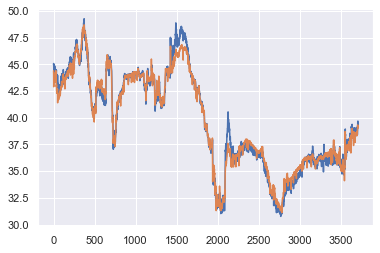

In [364]:
target = 0
print('LSTM_testY[:, target].shape:', LSTM_testY[:, target].shape)
plt.plot(LSTM_testPredict[:, target])
plt.plot(LSTM_testY[:, target])
# plt.plot(LSTM_testY[:, target])

In [415]:
temp_sen_list = [0,1,2,3,4,5,6,7,8,9,10,11]
if target in [0,1,2,3]:
    target_list = [0,1,2,3]
    target_node = 43
    for i in target_list:
        temp_sen_list.remove(i)
elif target in [4,5,6,7]:
    target_list = [4,5,6,7]
    target_node = 63
    for i in target_list:
        temp_sen_list.remove(i)
    
elif target in [8,9,10,11]:
    target_list  = [8,9,10,11]
    target_node = 65
    for i in target_list:
        temp_sen_list.remove(i)
print('target:',target, 'target_list:', target_list, 'temp_sen_list:', temp_sen_list)
print('target_node:', target_node)

target: 0 target_list: [0, 1, 2, 3] temp_sen_list: [4, 5, 6, 7, 8, 9, 10, 11]
target_node: 43


In [408]:
t = 0
temp_value = np.zeros((12,1))
# target에 따라서 설정해줘야함! 추후에 작업 필요
temp_value[4:12] = test[temp_sen_list, 32+t]
prediction_result = prediction_result = model.predict(Data_set[ : ,-32: ].reshape(1,12,32))
temp_value[0:4] = prediction_result[0][target_list].reshape(4,1)
print(temp_value.shape)

(12, 1)


In [470]:
import prediction_model
tmax=5
phi=2
#visualizeLength = len(realData)
prediction_model=prediction_model.prediction_model(tmax=tmax,phi=phi)
sampt = 0
twait=tmax
sampIdxes=np.zeros(np.size(real_data)) # data를 얼마나 입력받을지 모르니까, 미리 만들어 놓는게 사실 말은 안되지만..., mark 1 when sampled 
sampData=np.zeros(np.size(real_data))*np.nan # 여기도 마찬가지
# initialization
Data_set = test[ : , 0:32]
# real_dataset = 
# real_dataset[ : , 0:32] = test[ : , 0:32]
twait_list = []
predicted_data = []

for t in range(len(LSTM_testY[ : , target])):
    if t==sampt:
        sampIdxes[t]=1
        sampData[t] = LSTM_testY[:,target][t]
        prediction_result = model.predict(Data_set[ : ,-32: ].reshape(1,12,32))
        # inverse transform
        target_temp = scaler.fit_transform(np.array(tot_info[sen_list[target]]).reshape(-1,1))
        prediction_result_value = scaler.inverse_transform(prediction_result[0][target].reshape(-1,1))
        print('prediction_result_value:{}, \n LSTM_testY[:,target][t]:{}'.format(prediction_result_value , LSTM_testY[:,target][t]))
        Residual = prediction_model.calculate_residual(prediction_result_value, LSTM_testY[:,target][t], phi)
        twait = prediction_model.calculate_twait(tmax, Residual)
        sampt = t+twait
#         Data_set.append(test[ : , 32 + t ])
        Data_set = np.hstack((Data_set, test[ : , 32 + t ].reshape(12,1,1)))
    else: 
        
        temp_value = np.zeros((12,1))
        # target에 따라서 설정해줘야함! 추후에 작업 필요
        temp_value[4:12] = test[temp_sen_list, 32+t]
        prediction_result = prediction_result = model.predict(Data_set[ : ,-32: ].reshape(1,12,32))
        temp_value[0:4] = prediction_result[0][target_list].reshape(4,1)
        Data_set = np.hstack((Data_set, temp_value.reshape(12,1,1)))
        
    twait_list.append(twait)
    print('Current time: ', t, '\t|| Sample rate: ', twait, '\t|| Next sample time: ', sampt)

prediction_result_value:[[44.948105]], 
 LSTM_testY[:,target][t]:44.4
Current time:  0 	|| Sample rate:  4 	|| Next sample time:  4
Current time:  1 	|| Sample rate:  4 	|| Next sample time:  4
Current time:  2 	|| Sample rate:  4 	|| Next sample time:  4
Current time:  3 	|| Sample rate:  4 	|| Next sample time:  4
prediction_result_value:[[46.903477]], 
 LSTM_testY[:,target][t]:44.1
Current time:  4 	|| Sample rate:  1 	|| Next sample time:  5
prediction_result_value:[[45.78389]], 
 LSTM_testY[:,target][t]:44.1
Current time:  5 	|| Sample rate:  2 	|| Next sample time:  7
Current time:  6 	|| Sample rate:  2 	|| Next sample time:  7
prediction_result_value:[[45.936028]], 
 LSTM_testY[:,target][t]:44.0
Current time:  7 	|| Sample rate:  2 	|| Next sample time:  9
Current time:  8 	|| Sample rate:  2 	|| Next sample time:  9
prediction_result_value:[[45.270657]], 
 LSTM_testY[:,target][t]:43.9
Current time:  9 	|| Sample rate:  2 	|| Next sample time:  11
Current time:  10 	|| Sample r

Current time:  105 	|| Sample rate:  2 	|| Next sample time:  106
prediction_result_value:[[44.21011]], 
 LSTM_testY[:,target][t]:43.2
Current time:  106 	|| Sample rate:  3 	|| Next sample time:  109
Current time:  107 	|| Sample rate:  3 	|| Next sample time:  109
Current time:  108 	|| Sample rate:  3 	|| Next sample time:  109
prediction_result_value:[[43.959457]], 
 LSTM_testY[:,target][t]:43.1
Current time:  109 	|| Sample rate:  3 	|| Next sample time:  112
Current time:  110 	|| Sample rate:  3 	|| Next sample time:  112
Current time:  111 	|| Sample rate:  3 	|| Next sample time:  112
prediction_result_value:[[43.88626]], 
 LSTM_testY[:,target][t]:43.2
Current time:  112 	|| Sample rate:  4 	|| Next sample time:  116
Current time:  113 	|| Sample rate:  4 	|| Next sample time:  116
Current time:  114 	|| Sample rate:  4 	|| Next sample time:  116
Current time:  115 	|| Sample rate:  4 	|| Next sample time:  116
prediction_result_value:[[43.66204]], 
 LSTM_testY[:,target][t]:43

Current time:  212 	|| Sample rate:  3 	|| Next sample time:  213
prediction_result_value:[[46.002193]], 
 LSTM_testY[:,target][t]:44.9
Current time:  213 	|| Sample rate:  3 	|| Next sample time:  216
Current time:  214 	|| Sample rate:  3 	|| Next sample time:  216
Current time:  215 	|| Sample rate:  3 	|| Next sample time:  216
prediction_result_value:[[45.923897]], 
 LSTM_testY[:,target][t]:44.7
Current time:  216 	|| Sample rate:  3 	|| Next sample time:  219
Current time:  217 	|| Sample rate:  3 	|| Next sample time:  219
Current time:  218 	|| Sample rate:  3 	|| Next sample time:  219
prediction_result_value:[[46.348663]], 
 LSTM_testY[:,target][t]:44.7
Current time:  219 	|| Sample rate:  2 	|| Next sample time:  221
Current time:  220 	|| Sample rate:  2 	|| Next sample time:  221
prediction_result_value:[[45.658024]], 
 LSTM_testY[:,target][t]:44.7
Current time:  221 	|| Sample rate:  3 	|| Next sample time:  224
Current time:  222 	|| Sample rate:  3 	|| Next sample time:

Current time:  321 	|| Sample rate:  4 	|| Next sample time:  324
Current time:  322 	|| Sample rate:  4 	|| Next sample time:  324
Current time:  323 	|| Sample rate:  4 	|| Next sample time:  324
prediction_result_value:[[45.48077]], 
 LSTM_testY[:,target][t]:45.7
Current time:  324 	|| Sample rate:  5 	|| Next sample time:  329
Current time:  325 	|| Sample rate:  5 	|| Next sample time:  329
Current time:  326 	|| Sample rate:  5 	|| Next sample time:  329
Current time:  327 	|| Sample rate:  5 	|| Next sample time:  329
Current time:  328 	|| Sample rate:  5 	|| Next sample time:  329
prediction_result_value:[[44.914944]], 
 LSTM_testY[:,target][t]:46.0
Current time:  329 	|| Sample rate:  3 	|| Next sample time:  332
Current time:  330 	|| Sample rate:  3 	|| Next sample time:  332
Current time:  331 	|| Sample rate:  3 	|| Next sample time:  332
prediction_result_value:[[45.53509]], 
 LSTM_testY[:,target][t]:46.2
Current time:  332 	|| Sample rate:  4 	|| Next sample time:  336


 LSTM_testY[:,target][t]:43.9
Current time:  427 	|| Sample rate:  2 	|| Next sample time:  429
Current time:  428 	|| Sample rate:  2 	|| Next sample time:  429
prediction_result_value:[[44.196957]], 
 LSTM_testY[:,target][t]:44.0
Current time:  429 	|| Sample rate:  5 	|| Next sample time:  434
Current time:  430 	|| Sample rate:  5 	|| Next sample time:  434
Current time:  431 	|| Sample rate:  5 	|| Next sample time:  434
Current time:  432 	|| Sample rate:  5 	|| Next sample time:  434
Current time:  433 	|| Sample rate:  5 	|| Next sample time:  434
prediction_result_value:[[43.710613]], 
 LSTM_testY[:,target][t]:43.5
Current time:  434 	|| Sample rate:  5 	|| Next sample time:  439
Current time:  435 	|| Sample rate:  5 	|| Next sample time:  439
Current time:  436 	|| Sample rate:  5 	|| Next sample time:  439
Current time:  437 	|| Sample rate:  5 	|| Next sample time:  439
Current time:  438 	|| Sample rate:  5 	|| Next sample time:  439
prediction_result_value:[[42.716877]],

Current time:  534 	|| Sample rate:  3 	|| Next sample time:  535
prediction_result_value:[[41.8936]], 
 LSTM_testY[:,target][t]:43.5
Current time:  535 	|| Sample rate:  2 	|| Next sample time:  537
Current time:  536 	|| Sample rate:  2 	|| Next sample time:  537
prediction_result_value:[[42.35984]], 
 LSTM_testY[:,target][t]:43.3
Current time:  537 	|| Sample rate:  3 	|| Next sample time:  540
Current time:  538 	|| Sample rate:  3 	|| Next sample time:  540
Current time:  539 	|| Sample rate:  3 	|| Next sample time:  540
prediction_result_value:[[41.975964]], 
 LSTM_testY[:,target][t]:43.5
Current time:  540 	|| Sample rate:  2 	|| Next sample time:  542
Current time:  541 	|| Sample rate:  2 	|| Next sample time:  542
prediction_result_value:[[42.51621]], 
 LSTM_testY[:,target][t]:43.2
Current time:  542 	|| Sample rate:  4 	|| Next sample time:  546
Current time:  543 	|| Sample rate:  4 	|| Next sample time:  546
Current time:  544 	|| Sample rate:  4 	|| Next sample time:  54

Current time:  636 	|| Sample rate:  4 	|| Next sample time:  639
Current time:  637 	|| Sample rate:  4 	|| Next sample time:  639
Current time:  638 	|| Sample rate:  4 	|| Next sample time:  639
prediction_result_value:[[39.08085]], 
 LSTM_testY[:,target][t]:43.5
Current time:  639 	|| Sample rate:  1 	|| Next sample time:  640
prediction_result_value:[[41.866882]], 
 LSTM_testY[:,target][t]:44.0
Current time:  640 	|| Sample rate:  1 	|| Next sample time:  641
prediction_result_value:[[42.469162]], 
 LSTM_testY[:,target][t]:44.5
Current time:  641 	|| Sample rate:  1 	|| Next sample time:  642
prediction_result_value:[[43.15163]], 
 LSTM_testY[:,target][t]:44.5
Current time:  642 	|| Sample rate:  2 	|| Next sample time:  644
Current time:  643 	|| Sample rate:  2 	|| Next sample time:  644
prediction_result_value:[[44.457043]], 
 LSTM_testY[:,target][t]:45.1
Current time:  644 	|| Sample rate:  4 	|| Next sample time:  648
Current time:  645 	|| Sample rate:  4 	|| Next sample tim

Current time:  741 	|| Sample rate:  3 	|| Next sample time:  743
Current time:  742 	|| Sample rate:  3 	|| Next sample time:  743
prediction_result_value:[[37.12788]], 
 LSTM_testY[:,target][t]:38.2
Current time:  743 	|| Sample rate:  3 	|| Next sample time:  746
Current time:  744 	|| Sample rate:  3 	|| Next sample time:  746
Current time:  745 	|| Sample rate:  3 	|| Next sample time:  746
prediction_result_value:[[37.09547]], 
 LSTM_testY[:,target][t]:38.3
Current time:  746 	|| Sample rate:  3 	|| Next sample time:  749
Current time:  747 	|| Sample rate:  3 	|| Next sample time:  749
Current time:  748 	|| Sample rate:  3 	|| Next sample time:  749
prediction_result_value:[[37.544]], 
 LSTM_testY[:,target][t]:38.3
Current time:  749 	|| Sample rate:  4 	|| Next sample time:  753
Current time:  750 	|| Sample rate:  4 	|| Next sample time:  753
Current time:  751 	|| Sample rate:  4 	|| Next sample time:  753
Current time:  752 	|| Sample rate:  4 	|| Next sample time:  753
pre

Current time:  843 	|| Sample rate:  5 	|| Next sample time:  847
Current time:  844 	|| Sample rate:  5 	|| Next sample time:  847
Current time:  845 	|| Sample rate:  5 	|| Next sample time:  847
Current time:  846 	|| Sample rate:  5 	|| Next sample time:  847
prediction_result_value:[[42.72501]], 
 LSTM_testY[:,target][t]:42.2
Current time:  847 	|| Sample rate:  4 	|| Next sample time:  851
Current time:  848 	|| Sample rate:  4 	|| Next sample time:  851
Current time:  849 	|| Sample rate:  4 	|| Next sample time:  851
Current time:  850 	|| Sample rate:  4 	|| Next sample time:  851
prediction_result_value:[[42.451405]], 
 LSTM_testY[:,target][t]:43.0
Current time:  851 	|| Sample rate:  4 	|| Next sample time:  855
Current time:  852 	|| Sample rate:  4 	|| Next sample time:  855
Current time:  853 	|| Sample rate:  4 	|| Next sample time:  855
Current time:  854 	|| Sample rate:  4 	|| Next sample time:  855
prediction_result_value:[[42.602303]], 
 LSTM_testY[:,target][t]:43.2

Current time:  948 	|| Sample rate:  5 	|| Next sample time:  949
prediction_result_value:[[44.22591]], 
 LSTM_testY[:,target][t]:44.1
Current time:  949 	|| Sample rate:  5 	|| Next sample time:  954
Current time:  950 	|| Sample rate:  5 	|| Next sample time:  954
Current time:  951 	|| Sample rate:  5 	|| Next sample time:  954
Current time:  952 	|| Sample rate:  5 	|| Next sample time:  954
Current time:  953 	|| Sample rate:  5 	|| Next sample time:  954
prediction_result_value:[[44.01094]], 
 LSTM_testY[:,target][t]:44.0
Current time:  954 	|| Sample rate:  5 	|| Next sample time:  959
Current time:  955 	|| Sample rate:  5 	|| Next sample time:  959
Current time:  956 	|| Sample rate:  5 	|| Next sample time:  959
Current time:  957 	|| Sample rate:  5 	|| Next sample time:  959
Current time:  958 	|| Sample rate:  5 	|| Next sample time:  959
prediction_result_value:[[43.78778]], 
 LSTM_testY[:,target][t]:44.1
Current time:  959 	|| Sample rate:  5 	|| Next sample time:  964
C

Current time:  1056 	|| Sample rate:  5 	|| Next sample time:  1060
Current time:  1057 	|| Sample rate:  5 	|| Next sample time:  1060
Current time:  1058 	|| Sample rate:  5 	|| Next sample time:  1060
Current time:  1059 	|| Sample rate:  5 	|| Next sample time:  1060
prediction_result_value:[[43.831173]], 
 LSTM_testY[:,target][t]:43.9
Current time:  1060 	|| Sample rate:  5 	|| Next sample time:  1065
Current time:  1061 	|| Sample rate:  5 	|| Next sample time:  1065
Current time:  1062 	|| Sample rate:  5 	|| Next sample time:  1065
Current time:  1063 	|| Sample rate:  5 	|| Next sample time:  1065
Current time:  1064 	|| Sample rate:  5 	|| Next sample time:  1065
prediction_result_value:[[43.98608]], 
 LSTM_testY[:,target][t]:44.0
Current time:  1065 	|| Sample rate:  5 	|| Next sample time:  1070
Current time:  1066 	|| Sample rate:  5 	|| Next sample time:  1070
Current time:  1067 	|| Sample rate:  5 	|| Next sample time:  1070
Current time:  1068 	|| Sample rate:  5 	|| N

prediction_result_value:[[43.75067]], 
 LSTM_testY[:,target][t]:43.7
Current time:  1163 	|| Sample rate:  5 	|| Next sample time:  1168
Current time:  1164 	|| Sample rate:  5 	|| Next sample time:  1168
Current time:  1165 	|| Sample rate:  5 	|| Next sample time:  1168
Current time:  1166 	|| Sample rate:  5 	|| Next sample time:  1168
Current time:  1167 	|| Sample rate:  5 	|| Next sample time:  1168
prediction_result_value:[[43.314045]], 
 LSTM_testY[:,target][t]:43.6
Current time:  1168 	|| Sample rate:  5 	|| Next sample time:  1173
Current time:  1169 	|| Sample rate:  5 	|| Next sample time:  1173
Current time:  1170 	|| Sample rate:  5 	|| Next sample time:  1173
Current time:  1171 	|| Sample rate:  5 	|| Next sample time:  1173
Current time:  1172 	|| Sample rate:  5 	|| Next sample time:  1173
prediction_result_value:[[43.545757]], 
 LSTM_testY[:,target][t]:43.7
Current time:  1173 	|| Sample rate:  5 	|| Next sample time:  1178
Current time:  1174 	|| Sample rate:  5 	||

Current time:  1267 	|| Sample rate:  5 	|| Next sample time:  1270
Current time:  1268 	|| Sample rate:  5 	|| Next sample time:  1270
Current time:  1269 	|| Sample rate:  5 	|| Next sample time:  1270
prediction_result_value:[[41.300457]], 
 LSTM_testY[:,target][t]:42.3
Current time:  1270 	|| Sample rate:  3 	|| Next sample time:  1273
Current time:  1271 	|| Sample rate:  3 	|| Next sample time:  1273
Current time:  1272 	|| Sample rate:  3 	|| Next sample time:  1273
prediction_result_value:[[40.97183]], 
 LSTM_testY[:,target][t]:42.6
Current time:  1273 	|| Sample rate:  2 	|| Next sample time:  1275
Current time:  1274 	|| Sample rate:  2 	|| Next sample time:  1275
prediction_result_value:[[41.644997]], 
 LSTM_testY[:,target][t]:42.9
Current time:  1275 	|| Sample rate:  2 	|| Next sample time:  1277
Current time:  1276 	|| Sample rate:  2 	|| Next sample time:  1277
prediction_result_value:[[42.45057]], 
 LSTM_testY[:,target][t]:42.8
Current time:  1277 	|| Sample rate:  5 	|

Current time:  1368 	|| Sample rate:  3 	|| Next sample time:  1369
prediction_result_value:[[44.34588]], 
 LSTM_testY[:,target][t]:44.4
Current time:  1369 	|| Sample rate:  5 	|| Next sample time:  1374
Current time:  1370 	|| Sample rate:  5 	|| Next sample time:  1374
Current time:  1371 	|| Sample rate:  5 	|| Next sample time:  1374
Current time:  1372 	|| Sample rate:  5 	|| Next sample time:  1374
Current time:  1373 	|| Sample rate:  5 	|| Next sample time:  1374
prediction_result_value:[[43.823544]], 
 LSTM_testY[:,target][t]:44.4
Current time:  1374 	|| Sample rate:  4 	|| Next sample time:  1378
Current time:  1375 	|| Sample rate:  4 	|| Next sample time:  1378
Current time:  1376 	|| Sample rate:  4 	|| Next sample time:  1378
Current time:  1377 	|| Sample rate:  4 	|| Next sample time:  1378
prediction_result_value:[[43.35532]], 
 LSTM_testY[:,target][t]:44.4
Current time:  1378 	|| Sample rate:  3 	|| Next sample time:  1381
Current time:  1379 	|| Sample rate:  3 	|| 

Current time:  1474 	|| Sample rate:  3 	|| Next sample time:  1475
prediction_result_value:[[47.077625]], 
 LSTM_testY[:,target][t]:45.4
Current time:  1475 	|| Sample rate:  2 	|| Next sample time:  1477
Current time:  1476 	|| Sample rate:  2 	|| Next sample time:  1477
prediction_result_value:[[47.381508]], 
 LSTM_testY[:,target][t]:45.4
Current time:  1477 	|| Sample rate:  2 	|| Next sample time:  1479
Current time:  1478 	|| Sample rate:  2 	|| Next sample time:  1479
prediction_result_value:[[48.215816]], 
 LSTM_testY[:,target][t]:45.5
Current time:  1479 	|| Sample rate:  1 	|| Next sample time:  1480
prediction_result_value:[[47.882515]], 
 LSTM_testY[:,target][t]:45.5
Current time:  1480 	|| Sample rate:  1 	|| Next sample time:  1481
prediction_result_value:[[46.710384]], 
 LSTM_testY[:,target][t]:45.5
Current time:  1481 	|| Sample rate:  3 	|| Next sample time:  1484
Current time:  1482 	|| Sample rate:  3 	|| Next sample time:  1484
Current time:  1483 	|| Sample rate:  

Current time:  1553 	|| Sample rate:  2 	|| Next sample time:  1554
prediction_result_value:[[48.418938]], 
 LSTM_testY[:,target][t]:46.7
Current time:  1554 	|| Sample rate:  2 	|| Next sample time:  1556
Current time:  1555 	|| Sample rate:  2 	|| Next sample time:  1556
prediction_result_value:[[48.67181]], 
 LSTM_testY[:,target][t]:46.6
Current time:  1556 	|| Sample rate:  1 	|| Next sample time:  1557
prediction_result_value:[[48.128807]], 
 LSTM_testY[:,target][t]:46.7
Current time:  1557 	|| Sample rate:  2 	|| Next sample time:  1559
Current time:  1558 	|| Sample rate:  2 	|| Next sample time:  1559
prediction_result_value:[[48.611885]], 
 LSTM_testY[:,target][t]:46.7
Current time:  1559 	|| Sample rate:  2 	|| Next sample time:  1561
Current time:  1560 	|| Sample rate:  2 	|| Next sample time:  1561
prediction_result_value:[[48.72786]], 
 LSTM_testY[:,target][t]:46.6
Current time:  1561 	|| Sample rate:  1 	|| Next sample time:  1562
prediction_result_value:[[48.450684]], 


Current time:  1659 	|| Sample rate:  5 	|| Next sample time:  1662
Current time:  1660 	|| Sample rate:  5 	|| Next sample time:  1662
Current time:  1661 	|| Sample rate:  5 	|| Next sample time:  1662
prediction_result_value:[[43.997677]], 
 LSTM_testY[:,target][t]:44.7
Current time:  1662 	|| Sample rate:  4 	|| Next sample time:  1666
Current time:  1663 	|| Sample rate:  4 	|| Next sample time:  1666
Current time:  1664 	|| Sample rate:  4 	|| Next sample time:  1666
Current time:  1665 	|| Sample rate:  4 	|| Next sample time:  1666
prediction_result_value:[[43.919678]], 
 LSTM_testY[:,target][t]:44.4
Current time:  1666 	|| Sample rate:  5 	|| Next sample time:  1671
Current time:  1667 	|| Sample rate:  5 	|| Next sample time:  1671
Current time:  1668 	|| Sample rate:  5 	|| Next sample time:  1671
Current time:  1669 	|| Sample rate:  5 	|| Next sample time:  1671
Current time:  1670 	|| Sample rate:  5 	|| Next sample time:  1671
prediction_result_value:[[43.200928]], 
 LST

Current time:  1766 	|| Sample rate:  4 	|| Next sample time:  1769
Current time:  1767 	|| Sample rate:  4 	|| Next sample time:  1769
Current time:  1768 	|| Sample rate:  4 	|| Next sample time:  1769
prediction_result_value:[[42.626934]], 
 LSTM_testY[:,target][t]:42.9
Current time:  1769 	|| Sample rate:  5 	|| Next sample time:  1774
Current time:  1770 	|| Sample rate:  5 	|| Next sample time:  1774
Current time:  1771 	|| Sample rate:  5 	|| Next sample time:  1774
Current time:  1772 	|| Sample rate:  5 	|| Next sample time:  1774
Current time:  1773 	|| Sample rate:  5 	|| Next sample time:  1774
prediction_result_value:[[43.111717]], 
 LSTM_testY[:,target][t]:42.6
Current time:  1774 	|| Sample rate:  4 	|| Next sample time:  1778
Current time:  1775 	|| Sample rate:  4 	|| Next sample time:  1778
Current time:  1776 	|| Sample rate:  4 	|| Next sample time:  1778
Current time:  1777 	|| Sample rate:  4 	|| Next sample time:  1778
prediction_result_value:[[42.69382]], 
 LSTM

Current time:  1875 	|| Sample rate:  4 	|| Next sample time:  1876
prediction_result_value:[[39.163193]], 
 LSTM_testY[:,target][t]:38.5
Current time:  1876 	|| Sample rate:  4 	|| Next sample time:  1880
Current time:  1877 	|| Sample rate:  4 	|| Next sample time:  1880
Current time:  1878 	|| Sample rate:  4 	|| Next sample time:  1880
Current time:  1879 	|| Sample rate:  4 	|| Next sample time:  1880
prediction_result_value:[[38.74705]], 
 LSTM_testY[:,target][t]:38.5
Current time:  1880 	|| Sample rate:  5 	|| Next sample time:  1885
Current time:  1881 	|| Sample rate:  5 	|| Next sample time:  1885
Current time:  1882 	|| Sample rate:  5 	|| Next sample time:  1885
Current time:  1883 	|| Sample rate:  5 	|| Next sample time:  1885
Current time:  1884 	|| Sample rate:  5 	|| Next sample time:  1885
prediction_result_value:[[38.760433]], 
 LSTM_testY[:,target][t]:38.1
Current time:  1885 	|| Sample rate:  4 	|| Next sample time:  1889
Current time:  1886 	|| Sample rate:  4 	||

 LSTM_testY[:,target][t]:33.1
Current time:  1980 	|| Sample rate:  5 	|| Next sample time:  1985
Current time:  1981 	|| Sample rate:  5 	|| Next sample time:  1985
Current time:  1982 	|| Sample rate:  5 	|| Next sample time:  1985
Current time:  1983 	|| Sample rate:  5 	|| Next sample time:  1985
Current time:  1984 	|| Sample rate:  5 	|| Next sample time:  1985
prediction_result_value:[[31.918213]], 
 LSTM_testY[:,target][t]:31.900000000000002
Current time:  1985 	|| Sample rate:  5 	|| Next sample time:  1990
Current time:  1986 	|| Sample rate:  5 	|| Next sample time:  1990
Current time:  1987 	|| Sample rate:  5 	|| Next sample time:  1990
Current time:  1988 	|| Sample rate:  5 	|| Next sample time:  1990
Current time:  1989 	|| Sample rate:  5 	|| Next sample time:  1990
prediction_result_value:[[30.10456]], 
 LSTM_testY[:,target][t]:32.5
Current time:  1990 	|| Sample rate:  1 	|| Next sample time:  1991
prediction_result_value:[[30.879787]], 
 LSTM_testY[:,target][t]:32.5

Current time:  2085 	|| Sample rate:  3 	|| Next sample time:  2086
prediction_result_value:[[30.011738]], 
 LSTM_testY[:,target][t]:32.9
Current time:  2086 	|| Sample rate:  1 	|| Next sample time:  2087
prediction_result_value:[[31.626629]], 
 LSTM_testY[:,target][t]:32.9
Current time:  2087 	|| Sample rate:  2 	|| Next sample time:  2089
Current time:  2088 	|| Sample rate:  2 	|| Next sample time:  2089
prediction_result_value:[[31.434193]], 
 LSTM_testY[:,target][t]:32.5
Current time:  2089 	|| Sample rate:  3 	|| Next sample time:  2092
Current time:  2090 	|| Sample rate:  3 	|| Next sample time:  2092
Current time:  2091 	|| Sample rate:  3 	|| Next sample time:  2092
prediction_result_value:[[30.796373]], 
 LSTM_testY[:,target][t]:34.3
Current time:  2092 	|| Sample rate:  1 	|| Next sample time:  2093
prediction_result_value:[[34.047367]], 
 LSTM_testY[:,target][t]:34.8
Current time:  2093 	|| Sample rate:  4 	|| Next sample time:  2097
Current time:  2094 	|| Sample rate:  

Current time:  2189 	|| Sample rate:  5 	|| Next sample time:  2191
Current time:  2190 	|| Sample rate:  5 	|| Next sample time:  2191
prediction_result_value:[[33.936897]], 
 LSTM_testY[:,target][t]:36.2
Current time:  2191 	|| Sample rate:  1 	|| Next sample time:  2192
prediction_result_value:[[36.14699]], 
 LSTM_testY[:,target][t]:36.1
Current time:  2192 	|| Sample rate:  5 	|| Next sample time:  2197
Current time:  2193 	|| Sample rate:  5 	|| Next sample time:  2197
Current time:  2194 	|| Sample rate:  5 	|| Next sample time:  2197
Current time:  2195 	|| Sample rate:  5 	|| Next sample time:  2197
Current time:  2196 	|| Sample rate:  5 	|| Next sample time:  2197
prediction_result_value:[[33.685123]], 
 LSTM_testY[:,target][t]:36.3
Current time:  2197 	|| Sample rate:  1 	|| Next sample time:  2198
prediction_result_value:[[34.875446]], 
 LSTM_testY[:,target][t]:36.3
Current time:  2198 	|| Sample rate:  2 	|| Next sample time:  2200
Current time:  2199 	|| Sample rate:  2 	

Current time:  2294 	|| Sample rate:  4 	|| Next sample time:  2296
Current time:  2295 	|| Sample rate:  4 	|| Next sample time:  2296
prediction_result_value:[[36.417484]], 
 LSTM_testY[:,target][t]:37.2
Current time:  2296 	|| Sample rate:  4 	|| Next sample time:  2300
Current time:  2297 	|| Sample rate:  4 	|| Next sample time:  2300
Current time:  2298 	|| Sample rate:  4 	|| Next sample time:  2300
Current time:  2299 	|| Sample rate:  4 	|| Next sample time:  2300
prediction_result_value:[[35.73949]], 
 LSTM_testY[:,target][t]:37.3
Current time:  2300 	|| Sample rate:  2 	|| Next sample time:  2302
Current time:  2301 	|| Sample rate:  2 	|| Next sample time:  2302
prediction_result_value:[[36.40653]], 
 LSTM_testY[:,target][t]:37.3
Current time:  2302 	|| Sample rate:  3 	|| Next sample time:  2305
Current time:  2303 	|| Sample rate:  3 	|| Next sample time:  2305
Current time:  2304 	|| Sample rate:  3 	|| Next sample time:  2305
prediction_result_value:[[36.154694]], 
 LST

 LSTM_testY[:,target][t]:37.8
Current time:  2397 	|| Sample rate:  4 	|| Next sample time:  2401
Current time:  2398 	|| Sample rate:  4 	|| Next sample time:  2401
Current time:  2399 	|| Sample rate:  4 	|| Next sample time:  2401
Current time:  2400 	|| Sample rate:  4 	|| Next sample time:  2401
prediction_result_value:[[35.87242]], 
 LSTM_testY[:,target][t]:37.5
Current time:  2401 	|| Sample rate:  2 	|| Next sample time:  2403
Current time:  2402 	|| Sample rate:  2 	|| Next sample time:  2403
prediction_result_value:[[35.345592]], 
 LSTM_testY[:,target][t]:37.7
Current time:  2403 	|| Sample rate:  1 	|| Next sample time:  2404
prediction_result_value:[[36.629436]], 
 LSTM_testY[:,target][t]:37.7
Current time:  2404 	|| Sample rate:  3 	|| Next sample time:  2407
Current time:  2405 	|| Sample rate:  3 	|| Next sample time:  2407
Current time:  2406 	|| Sample rate:  3 	|| Next sample time:  2407
prediction_result_value:[[36.716568]], 
 LSTM_testY[:,target][t]:37.6
Current tim

 LSTM_testY[:,target][t]:36.7
Current time:  2501 	|| Sample rate:  2 	|| Next sample time:  2503
Current time:  2502 	|| Sample rate:  2 	|| Next sample time:  2503
prediction_result_value:[[35.26445]], 
 LSTM_testY[:,target][t]:36.7
Current time:  2503 	|| Sample rate:  2 	|| Next sample time:  2505
Current time:  2504 	|| Sample rate:  2 	|| Next sample time:  2505
prediction_result_value:[[35.11272]], 
 LSTM_testY[:,target][t]:36.9
Current time:  2505 	|| Sample rate:  2 	|| Next sample time:  2507
Current time:  2506 	|| Sample rate:  2 	|| Next sample time:  2507
prediction_result_value:[[35.167423]], 
 LSTM_testY[:,target][t]:36.7
Current time:  2507 	|| Sample rate:  2 	|| Next sample time:  2509
Current time:  2508 	|| Sample rate:  2 	|| Next sample time:  2509
prediction_result_value:[[34.98092]], 
 LSTM_testY[:,target][t]:36.8
Current time:  2509 	|| Sample rate:  2 	|| Next sample time:  2511
Current time:  2510 	|| Sample rate:  2 	|| Next sample time:  2511
prediction_re

 LSTM_testY[:,target][t]:35.3
Current time:  2605 	|| Sample rate:  1 	|| Next sample time:  2606
prediction_result_value:[[34.564934]], 
 LSTM_testY[:,target][t]:35.2
Current time:  2606 	|| Sample rate:  4 	|| Next sample time:  2610
Current time:  2607 	|| Sample rate:  4 	|| Next sample time:  2610
Current time:  2608 	|| Sample rate:  4 	|| Next sample time:  2610
Current time:  2609 	|| Sample rate:  4 	|| Next sample time:  2610
prediction_result_value:[[32.265194]], 
 LSTM_testY[:,target][t]:35.0
Current time:  2610 	|| Sample rate:  1 	|| Next sample time:  2611
prediction_result_value:[[34.061363]], 
 LSTM_testY[:,target][t]:35.1
Current time:  2611 	|| Sample rate:  3 	|| Next sample time:  2614
Current time:  2612 	|| Sample rate:  3 	|| Next sample time:  2614
Current time:  2613 	|| Sample rate:  3 	|| Next sample time:  2614
prediction_result_value:[[32.435215]], 
 LSTM_testY[:,target][t]:34.9
Current time:  2614 	|| Sample rate:  1 	|| Next sample time:  2615
prediction

 LSTM_testY[:,target][t]:32.2
Current time:  2708 	|| Sample rate:  3 	|| Next sample time:  2711
Current time:  2709 	|| Sample rate:  3 	|| Next sample time:  2711
Current time:  2710 	|| Sample rate:  3 	|| Next sample time:  2711
prediction_result_value:[[31.154406]], 
 LSTM_testY[:,target][t]:32.0
Current time:  2711 	|| Sample rate:  3 	|| Next sample time:  2714
Current time:  2712 	|| Sample rate:  3 	|| Next sample time:  2714
Current time:  2713 	|| Sample rate:  3 	|| Next sample time:  2714
prediction_result_value:[[31.418615]], 
 LSTM_testY[:,target][t]:32.1
Current time:  2714 	|| Sample rate:  4 	|| Next sample time:  2718
Current time:  2715 	|| Sample rate:  4 	|| Next sample time:  2718
Current time:  2716 	|| Sample rate:  4 	|| Next sample time:  2718
Current time:  2717 	|| Sample rate:  4 	|| Next sample time:  2718
prediction_result_value:[[30.766624]], 
 LSTM_testY[:,target][t]:32.0
Current time:  2718 	|| Sample rate:  2 	|| Next sample time:  2720
Current time

Current time:  2813 	|| Sample rate:  2 	|| Next sample time:  2814
prediction_result_value:[[32.875698]], 
 LSTM_testY[:,target][t]:33.8
Current time:  2814 	|| Sample rate:  3 	|| Next sample time:  2817
Current time:  2815 	|| Sample rate:  3 	|| Next sample time:  2817
Current time:  2816 	|| Sample rate:  3 	|| Next sample time:  2817
prediction_result_value:[[32.43786]], 
 LSTM_testY[:,target][t]:34.1
Current time:  2817 	|| Sample rate:  2 	|| Next sample time:  2819
Current time:  2818 	|| Sample rate:  2 	|| Next sample time:  2819
prediction_result_value:[[32.818844]], 
 LSTM_testY[:,target][t]:33.3
Current time:  2819 	|| Sample rate:  5 	|| Next sample time:  2824
Current time:  2820 	|| Sample rate:  5 	|| Next sample time:  2824
Current time:  2821 	|| Sample rate:  5 	|| Next sample time:  2824
Current time:  2822 	|| Sample rate:  5 	|| Next sample time:  2824
Current time:  2823 	|| Sample rate:  5 	|| Next sample time:  2824
prediction_result_value:[[31.92225]], 
 LST

Current time:  2917 	|| Sample rate:  2 	|| Next sample time:  2918
prediction_result_value:[[33.433952]], 
 LSTM_testY[:,target][t]:34.4
Current time:  2918 	|| Sample rate:  3 	|| Next sample time:  2921
Current time:  2919 	|| Sample rate:  3 	|| Next sample time:  2921
Current time:  2920 	|| Sample rate:  3 	|| Next sample time:  2921
prediction_result_value:[[33.391613]], 
 LSTM_testY[:,target][t]:34.5
Current time:  2921 	|| Sample rate:  3 	|| Next sample time:  2924
Current time:  2922 	|| Sample rate:  3 	|| Next sample time:  2924
Current time:  2923 	|| Sample rate:  3 	|| Next sample time:  2924
prediction_result_value:[[33.234013]], 
 LSTM_testY[:,target][t]:34.7
Current time:  2924 	|| Sample rate:  2 	|| Next sample time:  2926
Current time:  2925 	|| Sample rate:  2 	|| Next sample time:  2926
prediction_result_value:[[33.38067]], 
 LSTM_testY[:,target][t]:34.7
Current time:  2926 	|| Sample rate:  2 	|| Next sample time:  2928
Current time:  2927 	|| Sample rate:  2 	

 LSTM_testY[:,target][t]:35.5
Current time:  3020 	|| Sample rate:  1 	|| Next sample time:  3021
prediction_result_value:[[35.382748]], 
 LSTM_testY[:,target][t]:35.5
Current time:  3021 	|| Sample rate:  5 	|| Next sample time:  3026
Current time:  3022 	|| Sample rate:  5 	|| Next sample time:  3026
Current time:  3023 	|| Sample rate:  5 	|| Next sample time:  3026
Current time:  3024 	|| Sample rate:  5 	|| Next sample time:  3026
Current time:  3025 	|| Sample rate:  5 	|| Next sample time:  3026
prediction_result_value:[[32.37894]], 
 LSTM_testY[:,target][t]:35.7
Current time:  3026 	|| Sample rate:  1 	|| Next sample time:  3027
prediction_result_value:[[34.376842]], 
 LSTM_testY[:,target][t]:35.7
Current time:  3027 	|| Sample rate:  2 	|| Next sample time:  3029
Current time:  3028 	|| Sample rate:  2 	|| Next sample time:  3029
prediction_result_value:[[33.608467]], 
 LSTM_testY[:,target][t]:35.8
Current time:  3029 	|| Sample rate:  1 	|| Next sample time:  3030
prediction_

Current time:  3124 	|| Sample rate:  4 	|| Next sample time:  3126
Current time:  3125 	|| Sample rate:  4 	|| Next sample time:  3126
prediction_result_value:[[33.12825]], 
 LSTM_testY[:,target][t]:36.2
Current time:  3126 	|| Sample rate:  1 	|| Next sample time:  3127
prediction_result_value:[[35.594048]], 
 LSTM_testY[:,target][t]:36.3
Current time:  3127 	|| Sample rate:  4 	|| Next sample time:  3131
Current time:  3128 	|| Sample rate:  4 	|| Next sample time:  3131
Current time:  3129 	|| Sample rate:  4 	|| Next sample time:  3131
Current time:  3130 	|| Sample rate:  4 	|| Next sample time:  3131
prediction_result_value:[[33.235607]], 
 LSTM_testY[:,target][t]:36.4
Current time:  3131 	|| Sample rate:  1 	|| Next sample time:  3132
prediction_result_value:[[34.818035]], 
 LSTM_testY[:,target][t]:36.2
Current time:  3132 	|| Sample rate:  2 	|| Next sample time:  3134
Current time:  3133 	|| Sample rate:  2 	|| Next sample time:  3134
prediction_result_value:[[33.246784]], 
 

Current time:  3229 	|| Sample rate:  5 	|| Next sample time:  3232
Current time:  3230 	|| Sample rate:  5 	|| Next sample time:  3232
Current time:  3231 	|| Sample rate:  5 	|| Next sample time:  3232
prediction_result_value:[[32.008865]], 
 LSTM_testY[:,target][t]:36.2
Current time:  3232 	|| Sample rate:  1 	|| Next sample time:  3233
prediction_result_value:[[35.00122]], 
 LSTM_testY[:,target][t]:36.2
Current time:  3233 	|| Sample rate:  3 	|| Next sample time:  3236
Current time:  3234 	|| Sample rate:  3 	|| Next sample time:  3236
Current time:  3235 	|| Sample rate:  3 	|| Next sample time:  3236
prediction_result_value:[[32.77652]], 
 LSTM_testY[:,target][t]:36.3
Current time:  3236 	|| Sample rate:  1 	|| Next sample time:  3237
prediction_result_value:[[35.924767]], 
 LSTM_testY[:,target][t]:36.1
Current time:  3237 	|| Sample rate:  5 	|| Next sample time:  3242
Current time:  3238 	|| Sample rate:  5 	|| Next sample time:  3242
Current time:  3239 	|| Sample rate:  5 	|

 LSTM_testY[:,target][t]:36.6
Current time:  3332 	|| Sample rate:  1 	|| Next sample time:  3333
prediction_result_value:[[35.662872]], 
 LSTM_testY[:,target][t]:36.7
Current time:  3333 	|| Sample rate:  3 	|| Next sample time:  3336
Current time:  3334 	|| Sample rate:  3 	|| Next sample time:  3336
Current time:  3335 	|| Sample rate:  3 	|| Next sample time:  3336
prediction_result_value:[[33.660763]], 
 LSTM_testY[:,target][t]:36.6
Current time:  3336 	|| Sample rate:  1 	|| Next sample time:  3337
prediction_result_value:[[35.9203]], 
 LSTM_testY[:,target][t]:36.6
Current time:  3337 	|| Sample rate:  4 	|| Next sample time:  3341
Current time:  3338 	|| Sample rate:  4 	|| Next sample time:  3341
Current time:  3339 	|| Sample rate:  4 	|| Next sample time:  3341
Current time:  3340 	|| Sample rate:  4 	|| Next sample time:  3341
prediction_result_value:[[33.142822]], 
 LSTM_testY[:,target][t]:36.6
Current time:  3341 	|| Sample rate:  1 	|| Next sample time:  3342
prediction_r

Current time:  3435 	|| Sample rate:  3 	|| Next sample time:  3437
Current time:  3436 	|| Sample rate:  3 	|| Next sample time:  3437
prediction_result_value:[[35.588562]], 
 LSTM_testY[:,target][t]:36.6
Current time:  3437 	|| Sample rate:  3 	|| Next sample time:  3440
Current time:  3438 	|| Sample rate:  3 	|| Next sample time:  3440
Current time:  3439 	|| Sample rate:  3 	|| Next sample time:  3440
prediction_result_value:[[35.13305]], 
 LSTM_testY[:,target][t]:36.7
Current time:  3440 	|| Sample rate:  2 	|| Next sample time:  3442
Current time:  3441 	|| Sample rate:  2 	|| Next sample time:  3442
prediction_result_value:[[35.465195]], 
 LSTM_testY[:,target][t]:36.3
Current time:  3442 	|| Sample rate:  3 	|| Next sample time:  3445
Current time:  3443 	|| Sample rate:  3 	|| Next sample time:  3445
Current time:  3444 	|| Sample rate:  3 	|| Next sample time:  3445
prediction_result_value:[[35.361588]], 
 LSTM_testY[:,target][t]:36.3
Current time:  3445 	|| Sample rate:  3 	

Current time:  3541 	|| Sample rate:  5 	|| Next sample time:  3544
Current time:  3542 	|| Sample rate:  5 	|| Next sample time:  3544
Current time:  3543 	|| Sample rate:  5 	|| Next sample time:  3544
prediction_result_value:[[35.464092]], 
 LSTM_testY[:,target][t]:35.4
Current time:  3544 	|| Sample rate:  5 	|| Next sample time:  3549
Current time:  3545 	|| Sample rate:  5 	|| Next sample time:  3549
Current time:  3546 	|| Sample rate:  5 	|| Next sample time:  3549
Current time:  3547 	|| Sample rate:  5 	|| Next sample time:  3549
Current time:  3548 	|| Sample rate:  5 	|| Next sample time:  3549
prediction_result_value:[[35.640987]], 
 LSTM_testY[:,target][t]:35.4
Current time:  3549 	|| Sample rate:  5 	|| Next sample time:  3554
Current time:  3550 	|| Sample rate:  5 	|| Next sample time:  3554
Current time:  3551 	|| Sample rate:  5 	|| Next sample time:  3554
Current time:  3552 	|| Sample rate:  5 	|| Next sample time:  3554
Current time:  3553 	|| Sample rate:  5 	|| 

 LSTM_testY[:,target][t]:38.3
Current time:  3647 	|| Sample rate:  5 	|| Next sample time:  3652
Current time:  3648 	|| Sample rate:  5 	|| Next sample time:  3652
Current time:  3649 	|| Sample rate:  5 	|| Next sample time:  3652
Current time:  3650 	|| Sample rate:  5 	|| Next sample time:  3652
Current time:  3651 	|| Sample rate:  5 	|| Next sample time:  3652
prediction_result_value:[[38.114075]], 
 LSTM_testY[:,target][t]:38.3
Current time:  3652 	|| Sample rate:  5 	|| Next sample time:  3657
Current time:  3653 	|| Sample rate:  5 	|| Next sample time:  3657
Current time:  3654 	|| Sample rate:  5 	|| Next sample time:  3657
Current time:  3655 	|| Sample rate:  5 	|| Next sample time:  3657
Current time:  3656 	|| Sample rate:  5 	|| Next sample time:  3657
prediction_result_value:[[37.72596]], 
 LSTM_testY[:,target][t]:38.0
Current time:  3657 	|| Sample rate:  5 	|| Next sample time:  3662
Current time:  3658 	|| Sample rate:  5 	|| Next sample time:  3662
Current time:  

In [473]:
visualizeLength = len(LSTM_testY[:, target])
# appxData=np.zeros(np.size(LSTM_testY[:,target]))*np.nan
# sampIdxes=np.where(sampIdxes[:visualizeLength]==1)[0]
sampIdxes2=np.where(sampIdxes[:visualizeLength]==1)[0]
print('sampIdxes2:', sampIdxes2)

sampIdxes2: [   0    4    5 ... 3699 3704 3709]


In [474]:
total_twait_list = []
for i in range(32):
    total_twait_list.append(1)
# total_twait_list = []
twait_list1 = np.copy(twait_list)
for i in range(len(twait_list1)-1):
    if twait_list1[i] == 1: 
        total_twait_list.append(twait_list1[i])
    else:
        total_twait_list.append(twait_list1[i])
        twait_list1[i+1] = twait_list1[i]-1
if total_twait_list[-1] != 1:
    total_twait_list.append(total_twait_list[-1]-1)
else:
    total_twait_list.append(1)
print('total_sen_index_list:', total_sen_index_list)
print('len(total_twait_list):', len(total_twait_list))

total_sen_index_list: [4, 5, 6, 7, 8, 9, 10, 11]
len(total_twait_list): 3744


In [566]:
test_raw_temp = test_raw[target_list, 0:32].reshape(4,32)
test_raw_temp = test_raw_temp.T
real_dataset = []

# for i in range(32):
#     real_dataset
for i in range(len(test_raw_temp)):
    real_dataset.append(test_raw_temp[i])
    
for i in range(len(LSTM_testY[ :, 1])):
    if i in sampIdxes2:
        real_dataset.append(LSTM_testY[ i ,target_list])
    else:
        real_dataset.append([np.nan, np.nan, np.nan, np.nan])
real_dataset = np.array(real_dataset)
print(real_dataset.shape)
predicted_dataset = []
for i in range(len(test_raw_temp)):
    predicted_dataset.append([np.nan, np.nan, np.nan, np.nan])
for i in range(len(LSTM_testY[ :, 1])):
    if i in sampIdxes2:
        predicted_dataset.append([np.nan, np.nan, np.nan, np.nan])
    else:
        pre_temp = []
        for j in target_list:
            target_temp = scaler.fit_transform(np.array(tot_info[sen_list[j]]).reshape(-1,1))
            pre_temp.append(scaler.inverse_transform(Data_set[j,i].reshape(-1,1)))
        predicted_dataset.append(np.array(pre_temp).reshape(4))
predicted_dataset = np.array(predicted_dataset)
print(predicted_dataset)
print('real_dataset.shape:', real_dataset.shape, 'predicted_dataset.shape:', predicted_dataset.shape)

(3744, 4)
[[        nan         nan         nan         nan]
 [        nan         nan         nan         nan]
 [        nan         nan         nan         nan]
 ...
 [        nan         nan         nan         nan]
 [38.59276918  3.52910703  7.53009319 24.02964445]
 [38.6         3.          6.         24.4       ]]
real_dataset.shape: (3744, 4) predicted_dataset.shape: (3744, 4)


In [608]:
pd_predicted = pd.DataFrame(predicted_dataset, columns = ['p_h', 'p_pm025', 'p_pm100', 'p_t' ], index = [np.array(dfs['time'][14976:18720])]  )
total_pd = pd.DataFrame(real_dataset, columns = ['h', 'pm025', 'pm100', 't' ], index = [np.array(dfs['time'][14976:18720])] )
total_pd['p_h'] = pd_predicted['p_h']
total_pd['p_pm025'] = pd_predicted['p_pm025']
total_pd['p_pm100'] = pd_predicted['p_pm100']
total_pd['p_t'] = pd_predicted['p_t']
total_pd['period'] = total_twait_list
total_pd['id'] = target_node
total_df['c_id'] = np.nan
total_df = pd.DataFrame(total_pd, columns= ['id', 'h', 'pm025', 'pm100', 't','p_h','p_pm025', 'p_pm100','p_t', 'period'])
total_df.to_csv('total_df.csv')

In [621]:
aa = dict(zip(np.array(dfs['time'][14976:18720]),    (zip(np.array(pd_predicted) , np.array(pd_real)      ))))
aa = pd.DataFrame(aa, index = ['predicted', 'real']).T
aa['period'] = total_twait_list
aa['id'] = target_node

NameError: name 'taget_node' is not defined

,predicted,real,period,id
2019-10-23 19:12,"[nan, nan, nan, nan]","[47.7, 6.0, 13.0, 25.1]",1,43
2019-10-23 19:14,"[nan, nan, nan, nan]","[47.6, 6.0, 12.0, 24.9]",1,43
2019-10-23 19:16,"[nan, nan, nan, nan]","[47.5, 5.0, 11.0, 24.8]",1,43
2019-10-23 19:18,"[nan, nan, nan, nan]","[47.4, 6.0, 10.0, 24.9]",1,43
2019-10-23 19:20,"[nan, nan, nan, nan]","[47.3, 6.0, 12.0, 24.8]",1,43
2019-10-23 19:22,"[nan, nan, nan, nan]","[47.3, 5.0, 10.0, 24.9]",1,43
2019-10-23 19:24,"[nan, nan, nan, nan]","[47.2, 6.0, 13.0, 25.0]",1,43
2019-10-23 19:26,"[nan, nan, nan, nan]","[47.0, 6.0, 15.0, 24.9]",1,43
2019-10-23 19:28,"[nan, nan, nan, nan]","[46.9, 6.0, 12.0, 25.1]",1,43
2019-10-23 19:30,"[nan, nan, nan, nan]","[46.8, 6.0, 13.0, 25.0]",1,43


In [248]:
# target_temp = scaler.fit_transform(np.array(tot_info[sen_list[target]]).reshape(-1,1))

# LSTM_testPredict = scaler.inverse_transform(LSTM_testPredict)

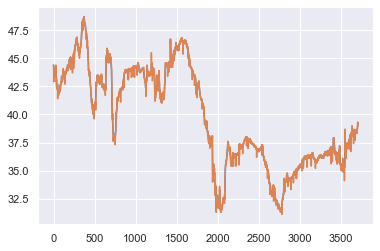

In [405]:
visualizeLength = len(LSTM_testY[:, target])
appxData=np.zeros(np.size(LSTM_testY[:,target]))*np.nan
sampIdxes=np.where(sampIdxes[:visualizeLength]==1)[0]
for prevt, postt in zip(sampIdxes, sampIdxes[1:]):
    if postt-prevt==1:
        appxData[prevt]=sampData[prevt]
    else:
        slope=(sampData[postt]-sampData[prevt])/(postt-prevt-1)
        appxData[prevt:postt]=((np.array(range(prevt,postt))-prevt)*slope)+sampData[prevt]
        # 맨 마지막 data 채워야 함	
appxData[-1] =  LSTM_testY[:,target][-1]
plt.plot(appxData)
plt.plot(LSTM_testY[:, target])

In [518]:
np.array(dfs['time'][14976:18720])

array(['2019-10-23 19:12', '2019-10-23 19:14', '2019-10-23 19:16', ...,
       '2019-10-28 23:54', '2019-10-28 23:56', '2019-10-28 23:58'],
      dtype=object)

In [427]:
# 14977 부터 18720까지가 테스트 하는 데이터 시간
len(dfs['time'][14976:18720])

3744

In [977]:
# GW에서 사용할 데이터셋 지정
GW_totalData = np.copy(np.array(dfs[sen_list]).T)
print('GW_totalData.shape:',GW_totalData.shape)

GW_totalData.shape: (12, 18720)


In [978]:
print('sen_list:', sen_list)

sen_list: ['h_41', 'pm025_41', 'pm100_41', 't_41', 'h_42', 'pm025_42', 'pm100_42', 't_42', 'h_61', 'pm025_61', 'pm100_61', 't_61']


In [979]:


sen_list = ['h_41', 'pm025_41', 'pm100_41', 't_41', 'h_42', 'pm025_42', 'pm100_42', 't_42', 'h_61', 'pm025_61', 'pm100_61', 't_61']
print('sen_list:', sen_list)
# target 설정 및 target ID 설정
if target in [0,1,2,3]:
    target_id = '47'
elif target in [4,5,6,7]:
    target_id = '48'
elif target in [8,9,10,11]:
    target_id = '49'
    
print('target:{}, target_id:{}'.format(target, target_id))

twait_new = 0
remain_list = ['47','48', '49']

target:4, target_id:48


In [980]:
##초기설정


In [997]:
sen_id = '49'
h1 = 49
pm1 = 10
pm2 = 9
t1 = 22

In [998]:
print('GW_totalData.shape:', GW_totalData.shape, '\n remain_list:', remain_list)

GW_totalData.shape: (12, 18721) 
 remain_list: ['49']


In [999]:
# 데이터가 들어오면 우선, period 값을 체크하여서, 0이 아닐 시에는 imputation mode 
# 0 일때에는 전송주기조절 모드 실행
# 임시적으로 period를 전송주기조절 값으로 생각
# GW_mode = 0 -> imputation
# GW_mode = 1 -> prediction




##
if twait_new != 0:
    GW_mode = 0
    if len(remain_list) == 3: 
        temp_list = np.zeros((12,1))
        
    period, remain_list, twait_new, GW_totalData, GW_nptf = GW_imputation(GW_totalData, GW_nptf, sen_id, h1,pm1,pm2, t1, remain_list, twait_new)
    if len(remain_list) == 0:
        remain_list = ['47','48','49']
    print('GW_mode:', GW_mode)
    print('sen_id:{} \n remain_list:{} \n twait_new:{}'.format(sen_id,remain_list,twait_new))
else:
    GW_mode = 1
    tmax = 5
    phi = 2
    if len(remain_list) == 3: 
        temp_list = np.zeros((12,1))
        
    period, remain_list, GW_totalData, GW_nptf, twait= GW_period_control(GW_totalData, GW_nptf, sen_id, h1,pm1,pm2, t1, remain_list,tmax,phi)
    if twait != 1:
        twait_new = 2*(twait-1)
    if len(remain_list) == 0:
        remain_list = ['47','48','49']
    print('GW_mode:', GW_mode)
    print('sen_id:{} \n remain_list:{} \n twait_new:{}'.format(sen_id,remain_list,twait_new))

    



temp_list: [[49.]
 [10.]
 [ 9.]
 [22.]
 [49.]
 [10.]
 [ 9.]
 [22.]
 [49.]
 [10.]
 [ 9.]
 [22.]]
GW_totalData:[[96.9 96.8 96.3 ... 83.8 49.  49. ]
 [ 1.   1.   1.  ...  9.  10.  10. ]
 [ 5.   5.   4.  ... 18.   9.   9. ]
 ...
 [ 2.   3.   3.  ... 21.  10.  10. ]
 [ 8.   8.  12.  ... 29.   9.   9. ]
 [21.4 21.3 21.3 ... 12.8 22.  22. ]], 
 GW_totalData.shape:(12, 18722)
GW_mode: 1
sen_id:49 
 remain_list:['47', '48', '49'] 
 twait_new:0


In [787]:
# GW_scaler : sensor data according to sen_list order
# GW_nptf : normalized sensor data in GW_scaler
# GW_totalData : original dataset, 
# this process is to get the normalized dataset about GW_totalData
def gen_nptf(GW_totalData):
    GW_nptf = []
    GW_scaler = []
    for i in range(len(GW_totalData)):
        temp_scaler = GW_totalData[i, : ]
        temp_nptf = scaler.fit_transform(temp_scaler.reshape(-1,1))
        GW_scaler.append(temp_scaler)
        GW_nptf.append(temp_nptf)
    GW_scaler = np.array(GW_scaler)
    GW_nptf = np.array(GW_nptf)
    return GW_nptf

In [912]:
# reporting interval value extraction
# we need to select target node
# therefore, predict the node data value 
# imputation mode
# target : sensor data for period control 
# target_id : sensor node for imputation
# need the control mode
# 0: imputatation 
# 1: control mode 

# period is not 0
# 업데이트 될 떄 마다 바뀌지 않고 초기 설정 값으로 사용
# remain_list = ['47', '48', '49']

# GW_mode = 0

def GW_imputation(GW_totalData, GW_nptf, sen_id, h1,pm1,pm2, t1, remain_list, twait_new):
    
    imputationDa = GW_nptf[ : , -32: ].reshape(1,12,32)
    result_imputationDa = model.predict(imputationDa)
    result_impuDa = []
    for i in range(len(GW_nptf)):
        temp_fit =scaler.fit_transform(GW_totalData[i, :].reshape(-1,1))
        temp_impuDa = scaler.inverse_transform(result_imputationDa[0][i].reshape(-1,1))
        result_impuDa.append(temp_impuDa)

    # result_impuDa contains all of sensor prediction value 
    # we need only target sensor node value 
    # reuslt_imuDa 1 x 12 
    result_impuDa = np.array(result_impuDa)

    # mode : imputataion mode, 
    # target node : imputation by prediction 
    # non-target node : real data input

    

    # Check target_id
    if target_id in remain_list:
        if target_id == '47':
            temp_list[0:4] = result_impuDa[0:4].reshape(4,1)
            remain_list.remove('47')
        elif target_id == '48':
            temp_list[4:8] = result_impuDa[4:8].reshape(4,1)
            remain_list.remove('48')
        elif target_id == '49':
            temp_list[8:12] = result_impuDa[8:12].reshape(4,1)
            remain_list.remove('49')

    if sen_id == '47':
        temp_list[0:4] = np.array([h1,pm1,pm2,t1]).reshape(4,1)
        remain_list.remove('47')
    elif sen_id =='48':
        temp_list[4:8] = np.array([h1,pm1,pm2,t1]).reshape(4,1)
        remain_list.remove('48')
    elif sen_id =='49':
        temp_list[8:12] = np.array([h1,pm1,pm2,t1]).reshape(4,1)
        remain_list.remove('49')

    if len(remain_list) == 0:
        print('temp_list:', temp_list)
        # 전체 데이터 셋에 현재 타임 데이터 값을 입력
        GW_totalData = np.hstack((GW_totalData,temp_list ))
        GW_nptf = gen_nptf(GW_totalData)
        print('GW_totalData:{}, \n GW_totalData.shape:{}'.format(GW_totalData, GW_totalData.shape))
    twait_new = twait_new - 1
    period = 1
    return period, remain_list, twait_new, GW_totalData, GW_nptf



# target_id:  47, 48 ,49



# target_id = '47'

In [913]:
# prediction mode, GW_mode = 1
# 함수로 만들어야 할 듯 
# Id, t,h, pm1,pm2, remain_list 값 인풋
# output period, remain_list

# 호출될 때 마다 실행되지 않고, global var로 설정하고, 호출될 때 마다 수행되는 변수 설정 문의 

# GW_mode = 1


# remain_list = ['47','48','49']


def GW_period_control(GW_totalData, GW_nptf, sen_id, h1,pm1,pm2, t1, remain_list,tmax,phi):
# period = 0 인 경우에 해당함
#     temp_list =  []
#     temp_list = np.zeros((12,1))
#     remain_list = ['47', '48', '49']

    # if id == target_id:
    #     # Check target_id
    #     if target_id == '47':
    #         temp_list[0:4] = result_preDa[0:4].reshape(4,1)
    #         remain_list.remove('47')
    #     elif target_id == '48':
    #         temp_list[4:8] = result_preDa[4:8].reshape(4,1)
    #         remain_list.remove('48')
    #     elif target_id == '49':
    #         temp_list[8:12] = result_preDa[8:12].reshape(4,1)
    #         remain_list.remove('49')
    # else:
    # Check input data sensor ID
    if sen_id == target_id:
        # test the prediction model by using GW_nptf which is normalized dataset
        testDa = GW_nptf[ :, -32:].reshape(1,12,32)
        result_predictDa = model.predict(testDa)
        result_preDa = []
        # predicted and normalized data -> predicted and original value data
        for i in range(len(GW_nptf)):
            temp_fit =scaler.fit_transform(GW_totalData[i, :].reshape(-1,1))
            temp_predictDa = scaler.inverse_transform(result_predictDa[0][i].reshape(-1,1))
            result_preDa.append(temp_predictDa)

        # result_impuDa contains all of sensor prediction value 
        # we need only target sensor node value 
        # reuslt_imuDa 1 x 12 
        result_preDa = np.array(result_preDa)
        predicted_data = result_preDa[target] 
        if target_id == '47':
            temp_list[0:4] = np.array([h1,pm1,pm2,t1]).reshape(4,1)
            remain_list.remove('47')
        elif target_id =='48':
            temp_list[4:8] = np.array([h1,pm1,pm2,t1]).reshape(4,1)
            remain_list.remove('48')
        elif target_id =='49':
            temp_list[8:12] = np.array([h1,pm1,pm2,t1]).reshape(4,1)
            remain_list.remove('49')
        import prediction_model
        real_data = temp_list[target]
        print('predicted_data:{}, \n real_data:{}'.format(predicted_data, real_data))
        prediction_model=prediction_model.prediction_model(tmax=tmax,phi=phi)
        Residual = prediction_model.calculate_residual(predicted_data, real_data, phi)
        twait = prediction_model.calculate_twait(tmax,Residual)
        print('twait:', twait, 'Residual:', Residual)
#         period = 2*(twait-1)
        period = twait
    else:
        if sen_id == '47':
            temp_list[0:4] = np.array([h1,pm1,pm2,t1]).reshape(4,1)
            remain_list.remove('47')
        elif sen_id =='48':
            temp_list[4:8] = np.array([h1,pm1,pm2,t1]).reshape(4,1)
            remain_list.remove('48')
        elif sen_id =='49':
            temp_list[8:12] = np.array([h1,pm1,pm2,t1]).reshape(4,1)
            remain_list.remove('49')        
        period = 1
        twait = period
        
    # 47, 48, 49번 센서 노드의 값이 모두 들어왔으면
    if len(remain_list) == 0:
        print('temp_list:', temp_list)
        # 전체 데이터 셋에 현재 타임 데이터 값을 입력
        GW_totalData = np.hstack((GW_totalData,temp_list ))
        GW_nptf = gen_nptf(GW_totalData)
        print('GW_totalData:{}, \n GW_totalData.shape:{}'.format(GW_totalData, GW_totalData.shape))
        
    return period, remain_list, GW_totalData, GW_nptf, twait

# 세 개의 센서 노드에 대한 전송주기조절이 다 끝난 후

# period = period - 1

In [629]:
# # sesnr data receiving check
# # When http requset arrived, it should be done

# temp_list = []
# temp_list = np.zeros((12,1))
# remain_list = ['47', '48', '49']
# # id1 = 47
# # id2 = 48 
# # id3 = 49
# # 센서 아이디에 따라서 데이터 셋 구성 위치를 달리함
# if id == '47':
#     temp_list[0:4] = np.array([h1,pm1,pm2,t1]).reshape(4,1)
#     remain_list.remove('47')
# elif id =='48':
#     temp_list[4:8] = np.array([h1,pm1,pm2,t1]).reshape(4,1)
#     remain_list.remove('48')
# elif id =='49':
#     temp_list[8:12] = np.array([h1,pm1,pm2,t1]).reshape(4,1)
#     remain_list.remove('49')

# # 47, 48, 49번 센서 노드의 값이 모두 들어왔으면
# if len(remain_list) == 0:
#     # 전체 데이터 셋에 현재 타임 데이터 값을 입력
#     GW_totalData = np.hstack((GW_totalData,temp_list ))
    
# print('GW_totalData:{}, \n GW_totalData.shape:{}'.format(GW_totalData, GW_totalData.shape))
# # after that, 

In [225]:
import prediction_model
tmax=5
phi=2
twait=tmax
prediction_model=prediction_model.prediction_model(tmax=tmax,phi=phi)
Residual = prediction_model.calculate_residual(predicted_data, real_data, phi)
twait = prediction_model.calculate_twait(tmax,Residual)
print('twait:', twait, 'Residual:', Residual)

twait: 5 Residual: [[4.4823537e-06]]


In [549]:
# 게이트웨이에 저장된 데이터셋을 지정
# 데이터셋 사이즈 12 x ~~~
GW_totalData = np.copy(np.array(dfs[sen_list]).T) 
GW_time = dfs['time']
target = 4

# 습도, pm, pm, 온도
# h1 = LSTM_testX[1,0,1]
# pm1 =  LSTM_testX[1,1,1]
# pm2 = LSTM_testX[1,2,1]
# t1 = LSTM_testX[1,3,1]

# 데이터 예측 수행, 12개의 센서에서 32구간동안의 값을 불러옴
# 예측하는 인풋으로 인가될 수 있도록 RESHAPE
# mu : 임의의 시간 포인트
mu = -35
model_input_data = GW_totalData[0:12, mu-32:mu]
model_input_data = model_input_data.reshape(1,12,32)

# 실제값 가져오기
real_val = GW_totalData[target, mu+1]


# test123.astype(np.float32)

LSTM1_predict = model.predict(test123).reshape(-1)

# 텐서 값 출력
sess = tf.Session()
sess.run(LSTM1_predict)


# 데이터 예측
LSTM1_target_predict = LSTM1_predict[target]
tt = scaler.fit_transform(TT1[target,:])
LSTM1_target_value = scaler.inverse_transform(LSTM1_target_predict)

Residual = prediction_model.calculate_residual(test123, real_val, phi)
twait = prediction_model.calculate_twait(tmax,Residual)

ValueError: Expected 2D array, got 1D array instead:
array=[99.4 99.2 99.1 ... 86.3 86.7 87.3].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
import requests 
url = #"https://www.naver.com"
paramDict = { "period" : string(twait)}
response = requests.get(url, params=paramDict) print("status code :", response.status_code)

In [572]:
'''
['co2_41', 0번
 'h_41',   1번
 'pm025_41', 2번
 'pm100_41', 3번
 't_41', 4번 
 'tvoc_41', 5번 
 'co2_42', 6번
 'h_42',  7번
 'pm025_42', 8번
 'pm100_42', 9번
 't_42',   10번
 'tvoc_42', 11번 
 'co2_61', 12번
 'h_61',  13번 
 'pm025_61', 14번
 'pm100_61', 15번 
 't_61', 16번 
 'tvoc_61'] 17번

'''


LSTM_testY[:, target].shape: (3712,)


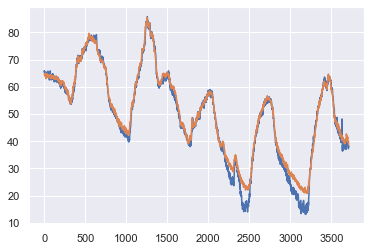

In [575]:
# import prediction_model
# tmax=5
# phi=2
# twait=tmax
# prediction_model=prediction_model.prediction_model(tmax=tmax,phi=phi)
# Residual = prediction_model.calculate_residual(predicted_data, real_data, phi)
# twait = prediction_model.calculate_twait(tmax,Residual)
# print('twait:', twait, 'Residual:', Residual)

Current time:  0 	|| Sample rate:  3 	|| Next sample time:  3
Current time:  1 	|| Sample rate:  3 	|| Next sample time:  3
Current time:  2 	|| Sample rate:  3 	|| Next sample time:  3
Current time:  3 	|| Sample rate:  5 	|| Next sample time:  8
Current time:  4 	|| Sample rate:  5 	|| Next sample time:  8
Current time:  5 	|| Sample rate:  5 	|| Next sample time:  8
Current time:  6 	|| Sample rate:  5 	|| Next sample time:  8
Current time:  7 	|| Sample rate:  5 	|| Next sample time:  8
Current time:  8 	|| Sample rate:  5 	|| Next sample time:  13
Current time:  9 	|| Sample rate:  5 	|| Next sample time:  13
Current time:  10 	|| Sample rate:  5 	|| Next sample time:  13
Current time:  11 	|| Sample rate:  5 	|| Next sample time:  13
Current time:  12 	|| Sample rate:  5 	|| Next sample time:  13
Current time:  13 	|| Sample rate:  5 	|| Next sample time:  18
Current time:  14 	|| Sample rate:  5 	|| Next sample time:  18
Current time:  15 	|| Sample rate:  5 	|| Next sample time

Current time:  619 	|| Sample rate:  5 	|| Next sample time:  623
Current time:  620 	|| Sample rate:  5 	|| Next sample time:  623
Current time:  621 	|| Sample rate:  5 	|| Next sample time:  623
Current time:  622 	|| Sample rate:  5 	|| Next sample time:  623
Current time:  623 	|| Sample rate:  5 	|| Next sample time:  628
Current time:  624 	|| Sample rate:  5 	|| Next sample time:  628
Current time:  625 	|| Sample rate:  5 	|| Next sample time:  628
Current time:  626 	|| Sample rate:  5 	|| Next sample time:  628
Current time:  627 	|| Sample rate:  5 	|| Next sample time:  628
Current time:  628 	|| Sample rate:  2 	|| Next sample time:  630
Current time:  629 	|| Sample rate:  2 	|| Next sample time:  630
Current time:  630 	|| Sample rate:  1 	|| Next sample time:  631
Current time:  631 	|| Sample rate:  2 	|| Next sample time:  633
Current time:  632 	|| Sample rate:  2 	|| Next sample time:  633
Current time:  633 	|| Sample rate:  1 	|| Next sample time:  634
Current ti

Current time:  1314 	|| Sample rate:  5 	|| Next sample time:  1316
Current time:  1315 	|| Sample rate:  5 	|| Next sample time:  1316
Current time:  1316 	|| Sample rate:  5 	|| Next sample time:  1321
Current time:  1317 	|| Sample rate:  5 	|| Next sample time:  1321
Current time:  1318 	|| Sample rate:  5 	|| Next sample time:  1321
Current time:  1319 	|| Sample rate:  5 	|| Next sample time:  1321
Current time:  1320 	|| Sample rate:  5 	|| Next sample time:  1321
Current time:  1321 	|| Sample rate:  3 	|| Next sample time:  1324
Current time:  1322 	|| Sample rate:  3 	|| Next sample time:  1324
Current time:  1323 	|| Sample rate:  3 	|| Next sample time:  1324
Current time:  1324 	|| Sample rate:  4 	|| Next sample time:  1328
Current time:  1325 	|| Sample rate:  4 	|| Next sample time:  1328
Current time:  1326 	|| Sample rate:  4 	|| Next sample time:  1328
Current time:  1327 	|| Sample rate:  4 	|| Next sample time:  1328
Current time:  1328 	|| Sample rate:  4 	|| Next

Current time:  2064 	|| Sample rate:  5 	|| Next sample time:  2069
Current time:  2065 	|| Sample rate:  5 	|| Next sample time:  2069
Current time:  2066 	|| Sample rate:  5 	|| Next sample time:  2069
Current time:  2067 	|| Sample rate:  5 	|| Next sample time:  2069
Current time:  2068 	|| Sample rate:  5 	|| Next sample time:  2069
Current time:  2069 	|| Sample rate:  4 	|| Next sample time:  2073
Current time:  2070 	|| Sample rate:  4 	|| Next sample time:  2073
Current time:  2071 	|| Sample rate:  4 	|| Next sample time:  2073
Current time:  2072 	|| Sample rate:  4 	|| Next sample time:  2073
Current time:  2073 	|| Sample rate:  5 	|| Next sample time:  2078
Current time:  2074 	|| Sample rate:  5 	|| Next sample time:  2078
Current time:  2075 	|| Sample rate:  5 	|| Next sample time:  2078
Current time:  2076 	|| Sample rate:  5 	|| Next sample time:  2078
Current time:  2077 	|| Sample rate:  5 	|| Next sample time:  2078
Current time:  2078 	|| Sample rate:  5 	|| Next

Current time:  2814 	|| Sample rate:  4 	|| Next sample time:  2815
Current time:  2815 	|| Sample rate:  2 	|| Next sample time:  2817
Current time:  2816 	|| Sample rate:  2 	|| Next sample time:  2817
Current time:  2817 	|| Sample rate:  2 	|| Next sample time:  2819
Current time:  2818 	|| Sample rate:  2 	|| Next sample time:  2819
Current time:  2819 	|| Sample rate:  2 	|| Next sample time:  2821
Current time:  2820 	|| Sample rate:  2 	|| Next sample time:  2821
Current time:  2821 	|| Sample rate:  3 	|| Next sample time:  2824
Current time:  2822 	|| Sample rate:  3 	|| Next sample time:  2824
Current time:  2823 	|| Sample rate:  3 	|| Next sample time:  2824
Current time:  2824 	|| Sample rate:  4 	|| Next sample time:  2828
Current time:  2825 	|| Sample rate:  4 	|| Next sample time:  2828
Current time:  2826 	|| Sample rate:  4 	|| Next sample time:  2828
Current time:  2827 	|| Sample rate:  4 	|| Next sample time:  2828
Current time:  2828 	|| Sample rate:  2 	|| Next

Current time:  3564 	|| Sample rate:  3 	|| Next sample time:  3565
Current time:  3565 	|| Sample rate:  4 	|| Next sample time:  3569
Current time:  3566 	|| Sample rate:  4 	|| Next sample time:  3569
Current time:  3567 	|| Sample rate:  4 	|| Next sample time:  3569
Current time:  3568 	|| Sample rate:  4 	|| Next sample time:  3569
Current time:  3569 	|| Sample rate:  1 	|| Next sample time:  3570
Current time:  3570 	|| Sample rate:  5 	|| Next sample time:  3575
Current time:  3571 	|| Sample rate:  5 	|| Next sample time:  3575
Current time:  3572 	|| Sample rate:  5 	|| Next sample time:  3575
Current time:  3573 	|| Sample rate:  5 	|| Next sample time:  3575
Current time:  3574 	|| Sample rate:  5 	|| Next sample time:  3575
Current time:  3575 	|| Sample rate:  4 	|| Next sample time:  3579
Current time:  3576 	|| Sample rate:  4 	|| Next sample time:  3579
Current time:  3577 	|| Sample rate:  4 	|| Next sample time:  3579
Current time:  3578 	|| Sample rate:  4 	|| Next

In [577]:
import prediction_model
tmax=5
phi=2
#visualizeLength = len(realData)
prediction_model=prediction_model.prediction_model(tmax=tmax,phi=phi)
sampt = 0
twait=tmax
sampIdxes=np.zeros(np.size(real_data)) # data를 얼마나 입력받을지 모르니까, 미리 만들어 놓는게 사실 말은 안되지만..., mark 1 when sampled 
sampData=np.zeros(np.size(real_data))*np.nan # 여기도 마찬가지
twait_list = []
for t in range(len(testY)):
    if t==sampt:
        sampIdxes[t]=1
        sampData[t] = LSTM_testY[:,target][t]
        Residual = prediction_model.calculate_residual(predicted_data[t], real_data[t], phi)
        twait = prediction_model.calculate_twait(tmax,Residual)
        sampt = t+twait
    twait_list.append(twait)
    print('Current time: ', t, '\t|| Sample rate: ', twait, '\t|| Next sample time: ', sampt)

visualizeLength = len(LSTM_testY[:, target])
appxData=np.zeros(np.size(LSTM_testY[:,target]))*np.nan
sampIdxes=np.where(sampIdxes[:visualizeLength]==1)[0]
for prevt, postt in zip(sampIdxes, sampIdxes[1:]):
    if postt-prevt==1:
        appxData[prevt]=sampData[prevt]
    else:
        slope=(sampData[postt]-sampData[prevt])/(postt-prevt-1)
        appxData[prevt:postt]=((np.array(range(prevt,postt))-prevt)*slope)+sampData[prevt]
        # 맨 마지막 data 채워야 함	
appxData[-1] =  LSTM_testY[:,target][-1]
plt.plot(appxData)
plt.plot(LSTM_testY[:, target])


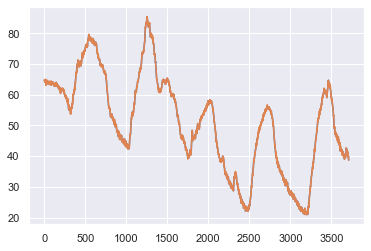

In [ ]:
## scaled data set 저장 필요


In [ ]:
test_target1 = scaled_dataset[-interval_len:]
test_target1 = test_target1.reshape(1,1,interval_len)
temp_predict = new_model.predict(test_target1)
predicted_data = scaler.inverse_transform(temp_predict)

In [ ]:
## imputataion

raw_dataset1 = np.append(raw_dataset1,real_data)
raw_dataset1 = raw_dataset1.reshape(-1,1)
print('raw_dataset1.shape:', raw_dataset1.shape)
scaled_dataset = scaler.fit_transform(raw_dataset1)
print('scaled_dataset.shape:',scaled_dataset.shape)

for i in range(twait-1): 
    test_target1 = scaled_dataset[-interval_len:]
    test_target1 = test_target1.reshape(1,1,interval_len)
    temp_predict = new_model.predict(test_target1)
    predicted_data = scaler.inverse_transform(temp_predict)
    print(predicted_data)
    raw_dataset1 = np.append(raw_dataset1, predicted_data)
    raw_dataset1 = raw_dataset1.reshape(-1,1)
    scaled_dataset = scaler.fit_transform(raw_dataset1)

print('scaled_dataset.shape:', scaled_dataset.shape, 'raw_dataset1.shape:', raw_dataset1.shape)

In [ ]:
#real_data = dfs['t_43'][-interval_len:]
# temp_scaled_dataset = np.copy(scaled_dataset)
test_target1 = scaled_dataset[-interval_len:]
test_target1 = test_target1.reshape(1,1,interval_len)
temp_predict = new_model.predict(test_target1)
predicted_data = scaler.inverse_transform(temp_predict)
considered_interval = considered_interval + twait
real_data = raw_dataset[considered_interval]
print('predicted_data:',predicted_data, 'real_data:', real_data)

In [ ]:
import prediction_model
prediction_model=prediction_model.prediction_model(tmax=tmax,phi=phi)
Residual = prediction_model.calculate_residual(predicted_data, real_data, phi)
twait = prediction_model.calculate_twait(tmax,Residual)
print('twait:', twait, 'Residual:', Residual)

In [119]:
import tensorflow as tf
from tensorflow import keras
import time
import datetime
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import animation
# new_model = keras.models.load_model('LSTM_model.h5')
# new_model.summary()

OSError: Unable to open file (unable to open file: name = 'LSTM_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [340]:
import csv
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
import numpy as np
import prediction_model

f = open('t_43.csv', 'r', encoding='utf-8')
rdr = csv.reader(f)
group_value = []
for line in rdr:
    group_value.append(float(line[0]))
f.close()
target_nptf =[]
scaler = MinMaxScaler(feature_range=(0, 1))

In [226]:
test_target1 = scaled_dataset[-interval_len:]
test_target1 = test_target1.reshape(1,1,interval_len)
temp_predict = new_model.predict(test_target1)
predicted_data = scaler.inverse_transform(temp_predict)

In [227]:
## imputataion

raw_dataset1 = np.append(raw_dataset1,real_data)
raw_dataset1 = raw_dataset1.reshape(-1,1)
print('raw_dataset1.shape:', raw_dataset1.shape)
scaled_dataset = scaler.fit_transform(raw_dataset1)
print('scaled_dataset.shape:',scaled_dataset.shape)

for i in range(twait-1): 
    test_target1 = scaled_dataset[-interval_len:]
    test_target1 = test_target1.reshape(1,1,interval_len)
    temp_predict = new_model.predict(test_target1)
    predicted_data = scaler.inverse_transform(temp_predict)
    print(predicted_data)
    raw_dataset1 = np.append(raw_dataset1, predicted_data)
    raw_dataset1 = raw_dataset1.reshape(-1,1)
    scaled_dataset = scaler.fit_transform(raw_dataset1)

print('scaled_dataset.shape:', scaled_dataset.shape, 'raw_dataset1.shape:', raw_dataset1.shape)

raw_dataset1.shape: (51, 1)
scaled_dataset.shape: (51, 1)
[[24.80032]]
[[24.798239]]
[[24.798717]]
[[24.796734]]
scaled_dataset.shape: (55, 1) raw_dataset1.shape: (55, 1)


In [228]:
#real_data = dfs['t_43'][-interval_len:]
# temp_scaled_dataset = np.copy(scaled_dataset)
test_target1 = scaled_dataset[-interval_len:]
test_target1 = test_target1.reshape(1,1,interval_len)
temp_predict = new_model.predict(test_target1)
predicted_data = scaler.inverse_transform(temp_predict)
considered_interval = considered_interval + twait
real_data = raw_dataset[considered_interval]
print('predicted_data:',predicted_data, 'real_data:', real_data)

predicted_data: [[24.792936]] real_data: [24.8]


In [229]:
import prediction_model
prediction_model=prediction_model.prediction_model(tmax=tmax,phi=phi)
Residual = prediction_model.calculate_residual(predicted_data, real_data, phi)
twait = prediction_model.calculate_twait(tmax,Residual)
print('twait:', twait, 'Residual:', Residual)

twait: 5 Residual: [[4.9884726e-05]]


In [336]:
## real data 인가시 
## 초기설정
tmax=5
phi=2
twait=tmax
considered_interval = 50
# 초기 테스트 데이터 셋
raw_dataset = np.array(group_value).reshape(-1,1).astype('float32')
raw_time = np.copy(dfs['time'])
raw_time1 = np.copy(dfs['time'][0:considered_interval])
raw_dataset1 = np.copy(raw_dataset[0:considered_interval])
scaled_dataset = scaler.fit_transform(raw_dataset1)

# 그래프 실시간 출력을 위한 변수 설정 
# plt.ion()
# lstX = [] 
# lstY = []
# fig = plt.figure()
# sf = fig.add_subplot(111)
# line1, = sf.plot(raw_time1, raw_dataset1, 'r-')
# lstX = list(raw_time1)
# lstY = list(raw_dataset1)


# 전체 데이터셋 구성 #
total_raw = pd.DataFrame(dict(zip(raw_time, raw_dataset))).T
total_raw.rename(columns ={0:"value"}, inplace = True)
total_raw1 = pd.DataFrame(dict(zip(raw_time1, raw_dataset1))).T
total_raw1.rename(columns ={0:"value"}, inplace = True)
print('raw_dataset_len:',len(raw_dataset), 'scaled_dataset_len:', len(scaled_dataset), 'total_raw.len:', len(total_raw))

import prediction_model
## 실행문
for i in range(15):
    # 전송주기 조절 계산 part
    import prediction_model
    test_target1 = scaled_dataset[-interval_len:]
    test_target1 = test_target1.reshape(1,1,interval_len)
    temp_predict = new_model.predict(test_target1)
    predicted_data = scaler.inverse_transform(temp_predict)
    real_data = raw_dataset[considered_interval]
    real_time = raw_time[considered_interval]
    print('considered_interval:', considered_interval)
    considered_interval = considered_interval + twait
    print('predicted_data:',predicted_data, 'real_data:', real_data)
    prediction_model=prediction_model.prediction_model(tmax=tmax,phi=phi)
    Residual = prediction_model.calculate_residual(predicted_data, real_data, phi)
    twait = prediction_model.calculate_twait(tmax,Residual)
    print('twait:', twait, 'Residual:', Residual)

    ## imputataion
    raw_dataset1 = np.append(raw_dataset1,real_data)
    raw_dataset1 = raw_dataset1.reshape(-1,1)
    print('raw_dataset1.shape:', raw_dataset1.shape)
    scaled_dataset = scaler.fit_transform(raw_dataset1)
    print('scaled_dataset.shape:',scaled_dataset.shape)
    
    # graph 설정
#     raw_time1 = np.append(raw_time1, real_time)
#     lstX.append(real_time)
#     lstY.append(real_data)
#     line1.set_xdata(lstX)
#     line1.set_ydata(lstY)
#     plt.draw(), plt.pause(0.0001)
    for i in range(twait-1):
        # 예측 값 imputation 시 시간 구간 입력
        raw_time1 = np.append(raw_time1, raw_time[considered_interval + i+1])
       # print(lstX)
        
        # 데이터 예측
        test_target1 = scaled_dataset[-interval_len:]
        test_target1 = test_target1.reshape(1,1,interval_len)
        temp_predict = new_model.predict(test_target1)
        predicted_data = scaler.inverse_transform(temp_predict)
        print(predicted_data)
        # 예측 데이터 추가하여 데이터셋 구성
        raw_dataset1 = np.append(raw_dataset1, predicted_data)
        raw_dataset1 = raw_dataset1.reshape(-1,1)
        scaled_dataset = scaler.fit_transform(raw_dataset1)
        
        
        # 그래프 그리기 위한 설정
#         lstX.append(raw_time[considered_interval+i+1])
#         lstY.append(predicted_data)
#         line1.set_xdata(lstX)
#         line1.set_ydata(lstY)
#         plt.plot(), plt.pause(0.0001)
    print('scaled_dataset.shape:', scaled_dataset.shape, 'raw_dataset1.shape:', raw_dataset1.shape)
    
 
    
    time.sleep(5)



raw_dataset_len: 20880 scaled_dataset_len: 50 total_raw.len: 20880
considered_interval: 50
predicted_data: [[24.797882]] real_data: [24.8]
twait: 5 Residual: [[4.4823537e-06]]
raw_dataset1.shape: (51, 1)
scaled_dataset.shape: (51, 1)
[[24.80032]]
[[24.798239]]
[[24.798717]]
[[24.796734]]
scaled_dataset.shape: (55, 1) raw_dataset1.shape: (55, 1)
considered_interval: 55
predicted_data: [[24.792936]] real_data: [24.8]
twait: 5 Residual: [[4.9884726e-05]]
raw_dataset1.shape: (56, 1)
scaled_dataset.shape: (56, 1)
[[24.795567]]
[[24.795546]]
[[24.796066]]
[[24.794947]]
scaled_dataset.shape: (60, 1) raw_dataset1.shape: (60, 1)
considered_interval: 60
predicted_data: [[24.795113]] real_data: [24.8]
twait: 5 Residual: [[2.3879125e-05]]
raw_dataset1.shape: (61, 1)
scaled_dataset.shape: (61, 1)
[[24.79821]]
[[24.798386]]
[[24.799374]]
[[24.799164]]
scaled_dataset.shape: (65, 1) raw_dataset1.shape: (65, 1)
considered_interval: 65
predicted_data: [[24.791794]] real_data: [24.8]
twait: 5 Residual: [

In [309]:
raw_dataset1[-5]

array([24.5], dtype=float32)

In [328]:
list(raw_time1)

[numpy.datetime64('2019-09-03T20:02:00.000000000'),
 numpy.datetime64('2019-09-03T20:04:00.000000000'),
 numpy.datetime64('2019-09-03T20:06:00.000000000'),
 numpy.datetime64('2019-09-03T20:08:00.000000000'),
 numpy.datetime64('2019-09-03T20:10:00.000000000'),
 numpy.datetime64('2019-09-03T20:12:00.000000000'),
 numpy.datetime64('2019-09-03T20:14:00.000000000'),
 numpy.datetime64('2019-09-03T20:16:00.000000000'),
 numpy.datetime64('2019-09-03T20:18:00.000000000'),
 numpy.datetime64('2019-09-03T20:20:00.000000000'),
 numpy.datetime64('2019-09-03T20:22:00.000000000'),
 numpy.datetime64('2019-09-03T20:24:00.000000000'),
 numpy.datetime64('2019-09-03T20:26:00.000000000'),
 numpy.datetime64('2019-09-03T20:28:00.000000000'),
 numpy.datetime64('2019-09-03T20:30:00.000000000'),
 numpy.datetime64('2019-09-03T20:32:00.000000000'),
 numpy.datetime64('2019-09-03T20:34:00.000000000'),
 numpy.datetime64('2019-09-03T20:36:00.000000000'),
 numpy.datetime64('2019-09-03T20:38:00.000000000'),
 numpy.datet

In [314]:
total_raw = pd.DataFrame(dict(zip(raw_time, raw_dataset))).T
total_raw.rename(columns ={0:"value"}, inplace = True)

NameError: name 'arrX' is not defined

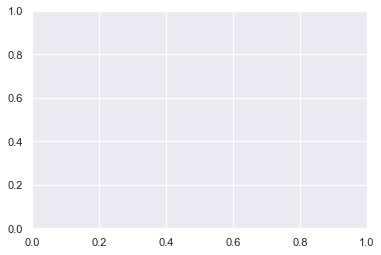

In [329]:
plt.ion()
lstX = [] 
lstY = []
fig = plt.figure()
sf = fig.add_subplot(111)
line1, = sf.plot(arrX, arrY, 'r-')
lstX = list(raw_time1)
lstY = list(raw_dataset1)

In [ ]:
# raw_dataset1 = np.append(raw_dataset1,real_data)
# raw_dataset1 = raw_dataset1.reshape(-1,1)
# print('raw_dataset1.shape:', raw_dataset1.shape)
# scaled_dataset = scaler.fit_transform(raw_dataset1)
# print('scaled_dataset.shape:',scaled_dataset.shape)

In [290]:
total_raw = pd.DataFrame(dict(zip(raw_time, raw_dataset1))).T
total_raw.rename(columns ={0:"value"}, inplace = True)
#index 접근
#total_raw.index

In [ ]:
# train_loader = torch.utils.data.DataLoader(dataset=trainData, batch_size=BATCH_SIZE, shuffle=False)
# test_loader = torch.utils.data.DataLoader(dataset=testData, batch_size=BATCH_SIZE, shuffle=False)
# trainX, trainY = create_dataset(train, look_back,estimated_len, 2)
# testX, testY = create_dataset(test, look_back,estimated_len, 2)
LSTM_trainX = np.reshape(trainX, (len(trainX),1,len(trainX[1].reshape(-1))))
LSTM_trainY = np.reshape(trainY, (len(trainY),len(trainY[1].reshape(-1))))
LSTM_testX = np.reshape(testX, (len(testX),1,len(testX[1].reshape(-1))))
LSTM_testY = np.reshape(testY, (len(testY),len(testY[1].reshape(-1))))
print('LSTM_trainX shape: {}, LSTM_trainY shape: {}, LSTM_testX shape: {}, LSTM_testY shape: {}'.format(LSTM_trainX.shape, LSTM_trainY.shape,LSTM_testX.shape,LSTM_testY.shape))


In [ ]:
# simple lstm network learning
model = Sequential()
model.add(LSTM(5, input_shape=(1, LSTM_trainX.shape[2])))
#model.add(flatten())
model.add(Dense(estimated_len))
model.compile(loss='mean_squared_error', optimizer='adam')
#early_stopping = EarlyStopping(monitor='val_loss', patience = 100, verbose= 1)
model.fit(LSTM_trainX, LSTM_trainY, epochs=200, batch_size=20, verbose=2)
# early_stopping = EarlyStopping(monitor='val_loss', patience = 100, verbose= 1)
# model.fit(trainX, trainY, epochs=500, batch_size=15, verbose=2, validation_split = 0.2,  callbacks=[early_stopping])

In [ ]:
# make prediction
LSTM_testPredict = model.predict(LSTM_testX)
# temp_scaler = scaler.fit_transform(nparr[target-1])
LSTM_testPredict = scaler.inverse_transform(LSTM_testPredict)
LSTM_testY = scaler.inverse_transform(LSTM_testY)
testScore = math.sqrt(mean_squared_error(realData, LSTM_testPredict))
print('Train Score: %.2f RMSE' % testScore)

plt.plot(realData, 'b-', label='reported data',linewidth =2.0)
plt.plot(LSTM_testPredict, 'r-', label ='raw data', linewidth =2.0)

print('LSTM_testY.shape: {}, LSTM_testPredict.shape: {}'.format(LSTM_testY.shape, LSTM_testPredict.shape))



# testacc4 = np.array(test_accuracy4)
# realData = scaler.inverse_transform(testacc1[199][2])
# predictData_RESNET = scaler.inverse_transform(testacc4[199][1])
# plt.plot(realData)
# plt.plot(predictData_RESNET)




In [ ]:
## 1d data imputation
# var : len_data_empty, predict_data, input_data, len_prediction_data
def period_contrl_imputation(len_data_empty, input_data, len_prediction_data, data_prediction_model  ):
    
    predict_data = np.zeros((len_data_empty))
    u = 0
    while(len_data_empty != 0):
        data_prediction_model.predict(input_data[-len_prediction_data: ]) = temp_predict_data
        input_data.append(temp_predict_data)
        predict_data[u] = temp_predict_data
        lengh_data_empty = length_data_empty - 1
        u = u+1
    return input_data, predict_data

In [ ]:
## 1d data prediction
def data_prediction_function( input_data, data_prediction_model, window_size):
    output = data_prediction_model(input_data[-window_size:])
    return output


In [ ]:
## Time dimension check
## 
def time_dim_check(input_data, time_duration):
    index_list = []
    
    for i in range(len(input_data)):
        diff_minute = int(input_data[i+1]['time'].split(':')[-1])-int(input_data[i]['time'].split(':')[-1)
        if diff_minute != time_duration and diff_minute != -(60-time_duration):
            index_list.append(input_data[i]['time'])
    return index_list

In [20]:
dt = datetime.datetime.now()

In [23]:
dt.strftime("%Y-%m-%d %H:%M")

'2019-11-03 02:45'

In [ ]:
nowDate = now.strftime('%Y-%m-%d %H:%M') 
pastDate = now - datetime.timedelta(timeDuration)
pastDate = pastDate.strftime('%Y-%m-%d %H:%M')

In [30]:
1 == (3 or 1)

False

In [ ]:


tmax=5
phi=2
visualizeLength = len(realData)
prediction_model=prediction_model.prediction_model(tmax=tmax,phi=phi)
sampt = 0
twait=tmax
sampIdxes=np.zeros(np.size(real_data)) # data를 얼마나 입력받을지 모르니까, 미리 만들어 놓는게 사실 말은 안되지만..., mark 1 when sampled 
sampData=np.zeros(np.size(real_data))*np.nan # 여기도 마찬가지
twait_list = []
for t in range(len(testY)):
    if t==sampt:
        sampIdxes[t]=1
        sampData[t] = testY[t]
        Residual = prediction_model.calculate_residual(predicted_data[t], real_data[t], phi)
        twait = prediction_model.calculate_twait(tmax,Residual)
        sampt = t+twait
    twait_list.append(twait)
    print('Current time: ', t, '\t|| Sample rate: ', twait, '\t|| Next sample time: ', sampt)

In [ ]:
appxData=np.zeros(np.size(testY))*np.nan
sampIdxes=np.where(sampIdxes[:visualizeLength]==1)[0]
for prevt, postt in zip(sampIdxes, sampIdxes[1:]):
    if postt-prevt==1:
        appxData[prevt]=sampData[prevt]
    else:
        slope=(sampData[postt]-sampData[prevt])/(postt-prevt-1)
        appxData[prevt:postt]=((np.array(range(prevt,postt))-prevt)*slope)+sampData[prevt]
        # 맨 마지막 data 채워야 함	
        
        
        # sampData.shape

In [ ]:

# http request 할 때 파라미터 전달 방법 
# import requests 
# URL = 'http://www.tistory.com'
# response = requests.get(URL)
# response.status_code
# print(response.text)

# params = {'param1': 'value1', 'param2': 'value'}
# res = requests.get(URL, params =params)
# res.url


# data = {'param1': 'value1', 'param2': 'value'}
# res = requests.post(URL, data= data)
# print(res)

@app.route('fileUpload'. method = ['GET'])
def upload_file():
    if request.emthod == 'GET':
        f = request.files(['file'])
        f.save(secure_filename(f.filename))
        reutrn 'Upload Done'
# url = "http://localhost:8090/fileUpload"

fin = open("test/test.txt", 'rb')
files = {'file' :fin }
try:
    r = requests.get(url, files = files) 
    print(r) 
finally:
    fin.close()
    
@app.route('fileUpload', method=['GET'])
def upload_file():
    if request.method == 'GET':
        f = request.files['file']
        f.save(secure_filename(f.filename))
        return "Upload Done"